<center>
    <u><h1>DATA PREPROCESSING:</h1>
    <h2>This notebook deals with data preprocessing and cleaning. This notebook includes fixing structural errors in features, changing dtypes into correct ones, feature selection and dealing with null values.</u></h2>
</center>

<center>
<h4>The dataset used here is <b><span style="color:blue"><a href="../../Step1-WebScrapper/car_prices_australia.csv">"Scripts/Step1-WebScrapper/car_prices_australia.csv".</a></span> which was scrapped from <b><span style="color:blue"><a href="https://www.ccarprice.com/au/">"https://www.ccarprice.com/au/"</a></span>
<br><br>
For the web scrapping python script click below:<br>
<span style="color:blue"><a href="../../Step1-WebScrapper/scrapper.py">Scrapper.py</a></span>
<br><br>For step 2 notebook; Exploratory Data Analysis click below:<br>
<span style="color:blue"><a href="../Step2/Step2-EDA.ipynb">Step2-EDA.ipynb</a></span>
<br><br>For the model training click below:<br>
<span style="color:blue"><a href="../../ModelTraining.ipynb">ModelTraining.ipynb</a></span>
</h4>
</center>

In [1170]:
import re

import pandas as pd
import numpy as np

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1171]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)
df = pd.read_csv("../../Step1-WebScrapper/car_prices_australia.csv")
df.shape

(2563, 98)

In [1172]:
df.head(5)

,price in aud,brand,model number,made in,warranty,available colors,body type,engine type,engine power,torque,no. of cylinders,transmission type,drive type,gear box,steering type,minimum turning radius,front suspension,back suspension,length,width,height,wheel base,ground clearance,kerb weight,tyre size,wheel size,front brake,rear brake,mileage in city,mileage on highway,fuel type,seating capacity,fuel tank capacity (litres),no. of doors,air conditioner,heater,antilock braking system,central locking,power steering,power windows,anti-lock braking,brake assist,power door locks,rear seat belts,seat belt warning,door ajar warning,adjustable seats,engine immobilizer,crash sensor,engine check warning,rear camera,anti-theft device,touch screen,audio system remote control,speakers front & back,bluetooth connectivity,usb & auxiliary input,adjustable steering column,height adjustable driving seat,digital clock,outside temperature display,smoke headlamps,electric folding rear view mirror,automatic climate control,low fuel warning light,rear reading lamp,bottle holder,voice control,steering gear type,child safety locks,night rear view mirror,vehicle stability control system,parking sensors,radio,fog lights front & back,keyless entry,centrally mounted fuel tank,leather seats,electric adjustable seats,charger,maximum speed,acceleration time (0-100 kmph),dvd player,boot space,tyre pressure monitor,smart access card entry,fuel system,tyre type,cd player,xenon headlamps,displacement (cc),halogen headlamps,assembled in,cassette player,shock absorbers type,valve configuration,removable/convertible top,introduction date
0,"25,963",Honda,city vx mt diesel 2022,japan,"basic: 3 years / 36,000 miles 4 years / 60,000...","black, blue glow metallic, cayenne orange meta...",sedan,water cooled inline i-vtec dohc with vtc,[email protected],[email protected],4 cylinders,manual,front wheel drive,6-speed,power,5.3 ft,mcpherson strut with coil spring,torsion beam with coil spring,4549 mm,1748 mm,1489 mm,2600 mm,165 mm,1191 kg,185/55 r16,r16,ventilated disc,drum,15.32 mpg,20.68 mpg,diesel,5 seaters,40.0 liter gallon,4 doors,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"23,256",Honda,city vx mt 2022,japan,"basic: 3 years / 36,000 miles 4 years / 60,000...","black, blue glow metallic, cayenne orange meta...",sedan,water cooled inline i-vtec dohc with vtc,[email protected],[email protected],4 cylinders,manual,front wheel drive,6-speed,power,5.3 ft,mcpherson strut with coil spring,torsion beam with coil spring,4549 mm,1748 mm,1489 mm,2600 mm,165 mm,1191 kg,185/55 r16,r16,ventilated disc,drum,16.28 mpg,20.68 mpg,petrol,5 seaters,40.0 liter gallon,4 doors,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"23,515",Honda,city v mt diesel 2022,japan,"basic: 3 years / 36,000 miles 4 years / 60,000...","black, blue glow metallic, cayenne orange meta...",sedan,water cooled inline i-dtec dohc,[email protected],[email protected],4 cylinders,manual,front wheel drive,6-speed,power,5.3 ft,mcpherson strut with coil spring,torsion beam with coil spring,4549 mm,1748 mm,1489 mm,2600 mm,165 mm,1191 kg,185/60 r15,r15,ventilated disc,drum,15.32 mpg,20.68 mpg,diesel,5 seaters,40.0 liter gallon,4 doors,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"20,650",Honda,city v mt 2022,japan,"basic: 3 years / 36,000 miles 4 years / 60,000...","black, blue glow metallic, cayenne

<span style="color:red"><b>
This dataset has 2563 rows and 98 columns of which not all will be used for traning model later on.<br> 
In addition, this dataset is very "dirty". So, first we'll fix structural errors in features and change dtypes.</span></b>

<span style="color:red">
    <b>
        <h1><center>
            <u>Dealing with duplicates</u>
        </h1></center>
    </b>

In [1173]:
#cheking to see if there are any duplicates
dup = df.loc[df.duplicated(subset=['price in aud', 'brand', 'model number'], keep="last")]
dup.shape

(54, 98)

In [1174]:
#Since there are some duplicates, keeping the last occurance of duplicates
df = df.drop_duplicates(keep="last")
df = df.reset_index(drop=True)
df.shape

(2538, 98)

<span style="color:red"><b>
Now the dataset has <u>2538 rows</u> and 98 columns. 
</b></span>

<span style="color:red">
    <b>
        <h1><center>
            <u>Visualizing missing values</u>
        </h1></center>
    </b>

<AxesSubplot:>

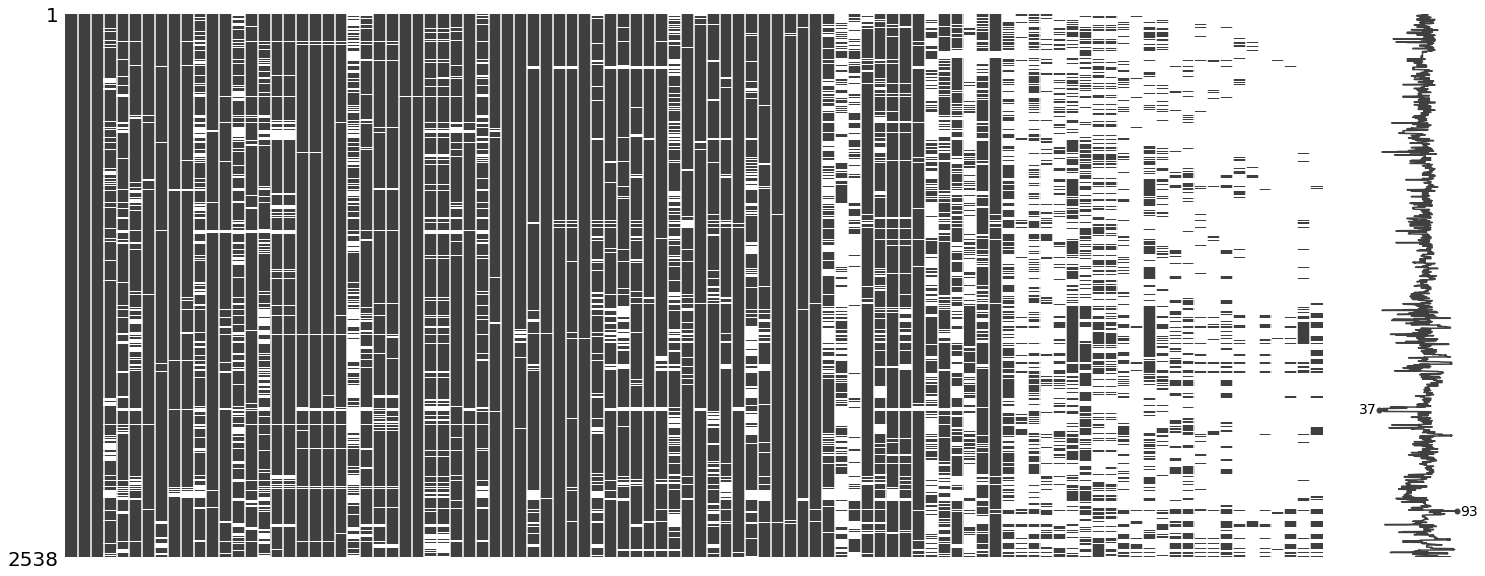

In [1175]:
msno.matrix(df)

<span style="color:red"><b>
From the above figure, it is clear that the right most features have a lot more missing values as compared with the left ones.
</b></span>

<span style="color:red">
<center><h2>Dropping features with large number of missing values:</h2></center>
</span>

In [1176]:
#print missing values of each features in percentage
missing_percentage = (df.isnull().sum()/df.shape[0])*100
missing_percentage = missing_percentage.to_frame().reset_index().rename(columns= {"index":"features", 0: 'percentage'})
missing_percentage

,features,percentage
0,price in aud,0.039
1,brand,0.000
2,model number,0.000
3,made in,13.633
4,warranty,12.333
5,available colors,12.333
6,body type,1.694
7,engine type,3.034
8,engine power,1.812
9,torque,4.413


<span style="color:red"><b>Many features have more than 50% of missing values. So, making 50% as threshold and dropping features with missing values more than that threshold.</b></span>

In [1177]:
#Taking  features having more than 50% of missing values into a list
to_remove_features = missing_percentage.loc[missing_percentage['percentage']>50]["features"].to_list()

#Dropping the features in the above list
df = df.drop(to_remove_features, axis="columns")
print(f'Now the number of features are: {df.shape[1]}')

Now the number of features are: 69


In [1178]:
df.shape

(2538, 69)

<span style="color:red"><b>
Now the dataset has 2538 rows and <u>69 columns</u>. 
</b></span>

<span style="color:red">
    <b>
        <h1><center>
            <u>Feature selection:</u>
        </h1></center>
    </b>

<span style="color:red"><b>
Here I basically manually selected and filtered out features which I thought were useful.<br>
    Features having more concentration of a single values are also filtered out such as the feature "digital clock" has a total of 1736 entries (excluding null values) out of which 1735 entries are "yes" and the remaining 1 entry is "no".
</b></span>

In [1179]:
df.describe()

,price in aud,brand,model number,made in,warranty,available colors,body type,engine type,engine power,torque,no. of cylinders,transmission type,drive type,gear box,steering type,minimum turning radius,front suspension,back suspension,length,width,height,wheel base,ground clearance,kerb weight,tyre size,wheel size,front brake,rear brake,mileage in city,mileage on highway,fuel type,seating capacity,fuel tank capacity (litres),no. of doors,air conditioner,heater,antilock braking system,central locking,power steering,power windows,anti-lock braking,brake assist,power door locks,rear seat belts,seat belt warning,door ajar warning,adjustable seats,engine immobilizer,crash sensor,engine check warning,rear camera,anti-theft device,touch screen,audio system remote control,speakers front & back,bluetooth connectivity,usb & auxiliary input,adjustable steering column,height adjustable driving seat,digital clock,electric folding rear view mirror,automatic climate control,low fuel warning light,rear reading lamp,bottle holder,steering gear type,child safety locks,vehicle stability control system,parking sensors
count,2537,2538,2538,2192,2225,2225,2495,2461,2492,2426,1877,2500,2448,1928,2399,1975,2304,2306,2473,2483,2476,2473,1373,2303,2381,2382,2532,2532,2120,2116,2368,2491,2161,2491,2537,2474,2380,2523,2506,2452,2528,2192,2334,2229,2338,2425,2388,1840,2346,2474,2221,2323,2500,1880,2312,2531,2521,2505,2515,1736,2365,2031,2322,2278,2444,1949,1649,1950,2449
unique,1727,50,2481,57,351,768,55,461,659,616,42,103,34,72,43,199,118,126,491,326,439,366,139,996,696,416,42,48,225,241,31,52,240,13,2,2,2,1,2,4,2,2,2,1,3,2,1,2,1,1,2,3,3,2,2,2,4,2,3,2,2,2,2,2,1,31,1,2,4
top,"59,760",Toyota,phantom extended wheelbase,american,"4 years / 50,000 miles","pearl white multi-coat, deep blue metallic, mi...",suv,2.0l turbo inline-4 gas,[email protected],[email protected],4,automatic,all-wheel drive,8-speed,power,38.1 ft,strut,multi-link,tbc,tbc,tbc,tbc,5.1 in,tbc,tbc,tbc,discs,discs,tbc,tbc,gasoline,5 seater,18.5 gallons,4 doors,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,rack-pinion,yes,yes,yes
freq,11,61,3,360,101,31,1085,235,208,205,616,1766,653,710,1825,76,681,1056,84,85,87,86,58,100,88,85,1731,1696,181,174,1208,1204,121,1688,2536,2472,2378,2523,2504,2447,2526,2169,2330,2229,2334,2422,2388,1836,2346,2474,2213,2318,2498,1877,2311,2530,2479,2502,2511,1735,2362,2025,2311,2276,2444,1291,1649,1948,2440


In [1180]:
#Filtering features
df = df[['price in aud', 'brand', 'model number', 'made in', 'body type', 'engine power', 'torque', 'no. of cylinders', 'transmission type', 'gear box', 'steering type', 'kerb weight', 'front brake', 'rear brake', 'mileage in city', 'mileage on highway', 'fuel type', 'seating capacity', 'fuel tank capacity (litres)', 'no. of doors']]
df.tail(5)

,price in aud,brand,model number,made in,body type,engine power,torque,no. of cylinders,transmission type,gear box,steering type,kerb weight,front brake,rear brake,mileage in city,mileage on highway,fuel type,seating capacity,fuel tank capacity (litres),no. of doors
2533,"53,280",Changan,cx70t 2021,NaN,suv,147 hp,230 nm,NaN,automatic,NaN,power,tbc,discs,discs,tbc,tbc,petrol,5 passengers,tbc,4 doors
2534,"14,501",Changan,alsvin v7 comfort,china,sedan,91kw (122hp) @6000rpm,156nm @ 3500-4500rpm,4 cylinder,automatic,4at,power,"1,220 kg",ventilated disc,solid disc,NaN,NaN,gasoline,5 persons,60 liters,4 doors
2535,"29,390",Changan,cs75 f,china,suv,175hp,230 nm,4 cylinder,automatic,6at,power,"1,665 kg",ventilated discs,solid discs,NaN,NaN,gasoline,5 persons,58 liters,5 doors
2536,"23,515",Changan,cs35 l,china,suv,123hp,160 nm,4 cylinder,automatic,4at,power,"1,290 kg",discs,discs,NaN,NaN,gasoline,5 persons,52 liters,5 doors
2537,"19,598",Changan,changan eado e,china,sedan,124hp,160 nm,4 cylinder,automatic,4at,power,"1,325 kg",discs,discs,NaN,NaN,gasoline,5 persons,52 liters,4 doors


In [1181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   price in aud                 2537 non-null   object
 1   brand                        2538 non-null   object
 2   model number                 2538 non-null   object
 3   made in                      2192 non-null   object
 4   body type                    2495 non-null   object
 5   engine power                 2492 non-null   object
 6   torque                       2426 non-null   object
 7   no. of cylinders             1877 non-null   object
 8   transmission type            2500 non-null   object
 9   gear box                     1928 non-null   object
 10  steering type                2399 non-null   object
 11  kerb weight                  2303 non-null   object
 12  front brake                  2532 non-null   object
 13  rear brake                   2532

In [1182]:
df.shape

(2538, 20)

<span style="color:red"><b>
Now the dataset has 2538 rows and <u>20 columns</u>. 
</b></span>

<span style="color:red">
    <b>
        <h1><center>
            <u>Feature modification:</u>
        </h1></center>
    </b>

<span style="color:red">
    <h2>For 'price in aud' feature:</h2>
</span>

In [1183]:
#Removing commas in every entries if there are any
df['price in aud'] = df['price in aud'].str.replace(',', '')
#changing dtype
df['price in aud'] = df['price in aud'].astype("float64")

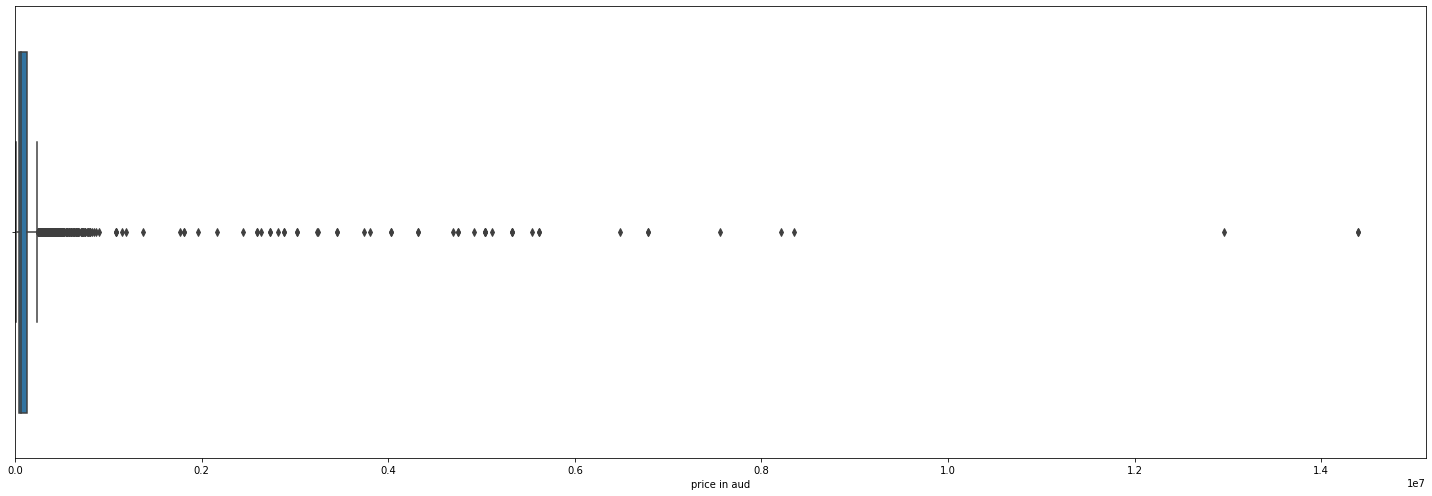

In [1184]:
fig, ax = plt.subplots(1,1, figsize=(20,7))
sns.boxplot(data=df, x='price in aud')
plt.xlim(0,)
plt.tight_layout()
plt.show()

In [1185]:
#Removing extreme car entries(over "6,000,000 aud")
df = df.loc[df["price in aud"]<0.6e7]

<span style="color:red">
    <h2>For 'brand' feature:</h2>
</span>

In [1186]:
df['brand'].value_counts()

Honda           60
Volkswagen      60
Suzuki          60
Renault         60
GMC             60
Buick           60
MINI            60
Alfa Romeo      60
Aston Martin    60
Mazda           60
Dodge           60
Maserati        60
Lamborghini     60
Lexus           60
Hyundai         60
Toyota          60
Ford            60
KIA             60
Nissan          60
Jaguar          59
Lincoln         59
Land Rover      59
Infiniti        59
Subaru          59
Chrysler        59
Genesis         59
Acura           59
Volvo           59
Cadillac        58
Audi            58
Jeep            58
Bentley         58
Chevrolet       58
Mercedes        58
Porsche         58
MG              57
BMW             56
Fiat            54
Tesla           53
Skoda           47
Ferrari         45
Mclaren         43
Rolls Royce     34
JAC             18
Changan         14
Bugatti         10
Lotus            9
Koenigsegg       6
Proton           3
Rimac            2
Name: brand, dtype: int64

<b>['Koenigsegg', 'Proton', 'Rimac'] have very low frequency. So, removing them from the dataframe. </b>

In [1187]:
#Removing ['Koenigsegg', 'Proton', 'Rimac']
df = df.loc[~df['brand'].isin(['Koenigsegg', 'Proton', 'Rimac'])]
#changing dtype
df['brand'] = df['brand'].astype("category")

<span style="color:red">
    <h2>For 'made in' feature:</h2>
</span>

In [1188]:
#dealing with manufacturing country feature
df['made in'].value_counts()

american                                                                                            359
japan                                                                                               320
british                                                                                             309
italy                                                                                               195
germany                                                                                             155
china                                                                                               124
south korea                                                                                          78
toledo north                                                                                         72
england                                                                                              66
canada                                                          

<b>As you can see, this feature is quite 'dirty'. So, first dealing with the obvious structural errors.</b>

In [1189]:
c = []
for i in df['made in']:
    if i == "nissan motor company" or i == "japan: miyawaka, fukuoka (toyota motor kyushu)" or i == "suzuki" or i == "japanese: hepburn: nissan jidōsha kabushiki-gaisha" or i == "japanese: hepburn: nissan jidĺťsha kabushiki-gaisha" or i == "japanese: hepburn: nissan jidōsha kabushiki-geisha":
        c.append('japan')
    elif i == "turin‎, italy" or i == "itlay" or i == "turinâ€ž, italy":
        c.append('italy')
    elif i == "american" or i == "north america" or i == "amarica" or i == 'america' or i == "us" or i == "united states, fremont, california(tesla factory)" or i == "tesla factory in austin" or i == "usa" or i == "fremont, california" or i == "united state" or i == "united states: louisville, kentucky (louisville assembly plant)  china: chongqing (changan ford)":
        c.append("united states")
    elif i == "indai":
        c.append("india")
    elif i == "britain" or i == "united kingdom" or i == "west sussex, england" or i == "british" or i == "england":
        c.append("united kingdom")
    elif i == "german" or i == "bavaria, germany" or i == "germany: zwickau (zwickau-mosel plant);[3] dresden (transparent factory)":
        c.append('germany')
    elif i == "south korea: ulsan" or i == "hyundai motor company":
        c.append('south korea')
    elif i == "mladá boleslav":
        c.append('czech republic ')
    elif i == "france: flins-sur-seine (flins renault factory)":
        c.append('france')
    else:
        c.append(i)
df['made in'] = c

'''
Now, Dealing with 'lexes (toyota) motor' element which has 41 entries by replacing it with its correct manufacture country by which can be figured out by looking at the model number
All models except for the ES, RX and RX Hybrid are produced in Japan. Lexus has a plant in Lexington, Kentucky, that produces its ES model.
Meanwhile, the RX and RX Hybrid are manufactured at the brand's plant in Cambridge, Ontario.
'''
ff = df.loc[df['made in']== 'lexes (toyota) motor']
index_ = ff.index
for num, i in enumerate(ff["model number"]):
    if 'rx' in i:
        df.loc[index_[num], 'made in'] = "canada"
    elif 'es' in i:
        df.loc[index_[num], 'made in'] = "united states"
    else:
        df.loc[index_[num], 'made in'] = "japan"

<b>The elements with low frequency(less than 8) should be removed</b>

In [1190]:
#Removing countries with low frequency(less than 8)
countries = df['made in'].value_counts().to_frame().reset_index().rename(columns= {"index":"made in", "made in": 'frequency'})
to_remove_countries = countries.loc[countries['frequency']<8]["made in"].to_list()
df = df.loc[~df['made in'].isin(to_remove_countries)]

In [1191]:
#Capitalizing the names of countries
con =[]
for i in df["made in"]:
    if type(i) == float:
        con.append(i)
    else:
        x = i.split(' ')
        if len(x) == 1:
            con.append(x[0].capitalize())
        elif len(x) == 2:
            con.append(f"{x[0].capitalize()} {x[1].capitalize()}")
df["made in"] = con

In [1192]:
#Changing dtype
df['made in'] = df['made in'].astype('category') 

df['made in'].value_counts()

United States     434
Japan             432
United Kingdom    385
Italy             229
Germany           162
China             124
South Korea        87
Canada             73
Toledo North       72
Maranello          44
Czech Republic     40
South Korean       28
India              23
France             12
Name: made in, dtype: int64

<span style="color:red">
    <h2>For 'model number' feature:</h2>
</span>

In [1193]:
#Converting "model number" feature to a 'year' feature
df = df.loc[df["model number"].str.contains(pat='\d\d\d\d', regex=True)]
li = df['model number'].str.extract(pat='(\d\d\d\d)')
df.rename(columns = {"model number":'year'}, inplace = True)
df['year'] = li
df.head(5)

,price in aud,brand,year,made in,body type,engine power,torque,no. of cylinders,transmission type,gear box,steering type,kerb weight,front brake,rear brake,mileage in city,mileage on highway,fuel type,seating capacity,fuel tank capacity (litres),no. of doors
0,25963.000,Honda,2022,Japan,sedan,[email protected],[email protected],4 cylinders,manual,6-speed,power,1191 kg,ventilated disc,drum,15.32 mpg,20.68 mpg,diesel,5 seaters,40.0 liter gallon,4 doors
1,23256.000,Honda,2022,Japan,sedan,[email protected],[email protected],4 cylinders,manual,6-speed,power,1191 kg,ventilated disc,drum,16.28 mpg,20.68 mpg,petrol,5 seaters,40.0 liter gallon,4 doors
2,23515.000,Honda,2022,Japan,sedan,[email protected],[email protected],4 cylinders,manual,6-speed,power,1191 kg,ventilated disc,drum,15.32 mpg,20.68 mpg,diesel,5 seaters,40.0 liter gallon,4 doors
3,20650.000,Honda,2022,Japan,sedan,[email protected],[email protected],4 cylinders,manual,6-speed,power,1191 kg,ventilated disc,drum,15.32 mpg,20.68 mpg,petrol,5 seaters,40.0 liter gallon,4 doors
4,23155.000,Honda,2022,Japan,sedan,[email protected],[email protected],4,automatic,cvt,power,1191 kg,ventilated disc,drum,16.28 mpg,20.68 mpg,petrol,5 seaters,40.0 liter gallon,4 doors


In [1194]:
df['year'].value_counts()

2022    1301
2023     442
2021     272
2020     126
2019      66
2018      29
1500      25
2024      15
2500      13
3500      13
2025       1
6463       1
Name: year, dtype: int64

In [1195]:
#There are some inaccurate years in the feature which will be replaced with null value
yr = []
for i in df['year']:
    if type(i) == float:
        yr.append(i)
    elif type(i) == str:
        if i in ["1500", "2024", "2500", "3500", "2025", "6463"]:
            yr.append(np.nan)
        else:
            yr.append(i)
    else:
        yr.append(i)
df['year'] = yr

df['year'].value_counts()

2022    1301
2023     442
2021     272
2020     126
2019      66
2018      29
Name: year, dtype: int64

In [1196]:
#Changing dtype
df['year'] = df['year'].astype('float64')

<span style="color:red">
    <h2>For 'body type' feature:</h2>
</span>

In [1197]:
df['body type'].value_counts()

suv                                                                1030
sedan                                                               444
coupe                                                               230
hatchback                                                           176
convertible                                                         113
truck                                                                74
minivan                                                              53
van                                                                  30
wagon                                                                27
sport utility                                                        22
roadster   category: sports car                                       7
coupe   category: sports car                                          6
heavy duty truck                                                      6
suv    category: full size suv   assembly: crewe, gb            

<b>As you can see, this feature is also quite 'dirty'. So, first dealing with the obvious structural errors.</b>

In [1198]:
bodyt = []
for i in df['body type']:
    if i == "roadster   category: sports car":
        bodyt.append('roadster')
    elif i == "coupe   category: sports car" or i == "coupe convertible":
        bodyt.append('coupe')
    elif i=="body code: s , body style: sport utility" or i=="subcompact luxury crossover suv" or i == "subcompact luxury crossover suv " or i == "suv    category: full size suv   assembly: crewe, gb" or i == "midsize suv" or i == "luxury midsize suv":
        bodyt.append('suv')
    elif i == "heavy duty truck" or i == "pickup truck":
        bodyt.append('truck')
    elif i == "hatchback   category: sports car" or i == "hatchback   category: city car   assembly: toluca, mx" or i == "5-door hatchback":
        bodyt.append('hatchback')
    elif i == "convertible   category: sports car   assembly: toluca, mx" or i == "convertible   category: sports car":
        bodyt.append('convertible')
    elif i == "sports car":
        bodyt.append('sports')
    elif i == "ody code: s , body style: sport utility" or i == "sport utility":
        bodyt.append('suv')
    elif i=="a luxury electric sedan" or i == "luxury sedan" or i == "sedan    category: luxury sedan   assembly: crewe, gb" or i == "luxury sedan" or i == "sedan   category: luxury sedan and coupe" or i == "4-door sedan luxury car" or i == "sedan    category: luxury sedan and coupe   assembly: crewe, gb":
        bodyt.append('sedan')
    elif i == 'wagen':
        bodyt.append('wagon')
    elif i == "passenger van":
        bodyt.append('van')
    else:
        bodyt.append(i)
df['body type'] = bodyt
df['body type'].value_counts()

suv                                        1061
sedan                                       450
coupe                                       237
hatchback                                   182
convertible                                 115
truck                                        82
minivan                                      53
van                                          35
wagon                                        28
roadster                                     12
sports                                        5
india                                         2
coupe, hatchback   category: sports car       1
spyder                                        1
none                                          1
‎hatchback                                    1
Name: body type, dtype: int64

In [1199]:
#Elements with frequency less than 3 are removed
bdy = df['body type'].value_counts().to_frame().reset_index().rename(columns= {"body type": 'frequency'})

to_remove_countries = bdy.loc[bdy['frequency']<3]["index"].to_list()

df = df.loc[~df['body type'].isin(to_remove_countries)]

#Changing dtype
df['body type'] = df['body type'].astype('category') 

df['body type'].value_counts()

suv            1061
sedan           450
coupe           237
hatchback       182
convertible     115
truck            82
minivan          53
van              35
wagon            28
roadster         12
sports            5
Name: body type, dtype: int64

<span style="color:red">
    <h2>For 'engine power' feature:</h2>
</span>

In [1200]:
#Changing column name
df.rename(columns = {'engine power':'engine power hp'}, inplace = True)

In [1201]:
#Replacing unrelated entries with null
df["engine power hp"] = [np.nan if x == '[email\xa0protected]' else x for x in df["engine power hp"]]

In [1202]:
df["engine power hp"].tail(10)

2514       135 hp @ 3,600 rpm
2524                   123 hp
2525                   123 hp
2526                   175 hp
2527    91kw (122hp) @6000rpm
2528        185 hp @ 5000 rpm
2530                   147 hp
2531        105 hp @ 6000 rpm
2532        105 hp @ 6000 rpm
2533                   147 hp
Name: engine power hp, dtype: object

<b>As you can see, this feature is 'very dirty'. So, first dealing with the obvious structural errors.</b>

In [1203]:
engine = []
for i in df['engine power hp']:
    if type(i) == float:
        engine.append(i)
    elif type(i) == str:
        if "@" in i:
            x = i.split("@")[0].strip()
            engine.append(f"{x}")
        elif "bhp" in i:
            if i == "184 ps or 181 bhp or 135 kw":
                i = "181 bhp"
            x = i.split("bhp")[0].strip()
            x = float(x)*1.013869665424
            engine.append(f"{x:.2f} hp")
        elif " hp " in i:
            x = i.split(" hp ")[0].strip()
            engine.append(f"{x} hp")
        elif "at" in i:
            x = i.split("at")[0].strip()
            engine.append(f"{x} hp")
        elif "horsepower" in i:
            x = i.split("horsepower")[0].strip()
            engine.append(f"{x} hp")
        elif "kw (" in i and "rwd" not in i and "awd" not in i and "fwd" not in i:
            x = float(i.split("kw (")[0].strip()) * 1.34102
            engine.append(f"{x:.2f} hp")
        elif "+" in i:
            x = i.split(" + ")[-1].strip()
            engine.append(f"{x}")
        elif "/" in i:
            x = i.split(" / ")[0].strip()
            engine.append(f"{x}")
        elif "fwd" in i:
            x = i.split(" (")[0].strip()
            x = i.split(" ")[0].strip()[0]
            engine.append(f"{x} hp")
        elif i == "-" or i == "tbc" or '[email\xa0protected]' in  i: #607
            engine.append(np.nan)
        elif "horsepower and" in i:
            x = i.split(" horsepower and")[0]
            engine.append(f"{x} hp")
        elif "double motor all-" in i:
            x = 225 * 1.34102
            engine.append(f"{x:.2f} hp")
        elif "kw (" in i and "rwd" in i:
            x = i.split("kw (")[0].strip().split(" ")[-1]
            x = float(x) * 1.34102
            engine.append(f"{x:.2f} hp")
        elif "kw (" in i and "awd" in i:
            x = i.split("kw (")[0].strip().split(" ")[-1]
            x = float(x) * 1.34102
            engine.append(f"{x:.2f} hp")
        elif "kw (" in i and "fwd" in i:
            x = i.split("kw (")[0].strip().split(" ")[-1]
            x = float(x) * 1.34102
            engine.append(f"{x:.2f} hp")
        elif "electric 283hp 317ft. lbs. /" in i:
            engine.append("283 hp")
        elif "electric 762hp 730ft." in i:
            engine.append("762 hp")
        elif "rwd 132 kw |179 hp|" in i:
            engine.append("179 hp")
        elif "184 ps or 181 bhp or 135 kw" in i:
            engine.append("181 hp")
        else:
            engine.append(i)
    else:
        engine.append(i)
df['engine power hp'] = engine        

        

engine = []
for i in df['engine power hp']:
    if type(i) == float:
        engine.append(i)
    elif type(i) == str:
        if "electric 283hp 317ft. lbs. /" in i or "electric 283hp 317ft. lbs." in i:
            engine.append("283 hp")
        elif i == "360nm":
            engine.append("360 hp")
        elif "electric 762hp 730ft." in i:
            engine.append("762 hp")
        elif "621 horsepower (463 kilow" in i:
            engine.append("621 hp")
        elif "rwd 132 kw |179 hp|" in i:
            engine.append("179 hp")
        elif "184 ps or 181 bhp or 135 kw" in i:
            engine.append("181 hp")
        elif i == "830- hp":
            engine.append("830 hp")
        elif "bhp (" in i:
            x = i.split(" bhp (")[0].strip()
            engine.append(f"{x} hp")
        elif "kw" in i:
            x = i.split("kw")[0].strip()
            x = float(x) * 1.34102
            engine.append(f"{x:.2f} hp")
        elif "ps" in i:
            x = i.split("ps")[0].strip()
            engine.append(f"{x} hp")
        elif "kw (" in i:
            x = i.split("kw (")[0].strip()
            x = float(x) * 1.34102
            engine.append(f"{x:.2f} hp")
        else:
            engine.append(i)
    else:
        engine.append(i)
df['engine power hp'] = engine  



engine = []
for i in df['engine power hp']:
    if type(i) == float:
        engine.append(i)
    elif type(i) == str:
        if "hp" in i and 'b' not in i:
            x = i.split("hp")[0].strip()
            engine.append(f"{x}")
        elif i == 'f':
            engine.append(np.nan)
        elif "bhp" in i:
            x = i.split("bhp")[0].strip()
            engine.append(f"{x}")
        else:
            engine.append(i)
    else:
        engine.append(i)
df['engine power hp'] = engine



engine = []
for i in df['engine power hp']:
    if type(i) == float:
        engine.append(i)
    elif type(i) == str:
        if i == 'f':
            engine.append(np.nan)
        elif i == '4 mj':
            engine.append(np.nan)
        else:
            engine.append(i)
    else:
        engine.append(i)
df['engine power hp'] = engine



engine = []
for i in df['engine power hp']:
    if type(i) == float:
        engine.append(i)
    elif type(i) == str:
        if "," in i:
            x = re.sub(",", "", i)
            engine.append(x)
        else:
            engine.append(i)
    else:
        engine.append(i)
df['engine power hp'] = engine

df['engine power hp'].tail(5)

2528    185
2530    147
2531    105
2532    105
2533    147
Name: engine power hp, dtype: object

In [1204]:
#Changing dtype of the feature
df['engine power hp'] = df['engine power hp'].astype("float64")

<span style="color:red">
    <h2>For 'torque' feature:</h2>
</span>

In [1205]:
#Changing column name
df.rename(columns = {'torque':'torque nm'}, inplace = True)

In [1206]:
#Replacing unrelated entries with null
df['torque nm'] = [np.nan if x == '[email\xa0protected]' else x for x in df["torque nm"]]

In [1207]:
df['torque nm'].tail(15)

2508    251 nm @ 1500-4500 rpm
2509    251 nm @ 1500-4500 rpm
2511        320 nm @ 1,600 rpm
2512        320 nm @ 1,600 rpm
2513        320 nm @ 1,600 rpm
2514        320 nm @ 1,600 rpm
2524                    160 nm
2525                    160 nm
2526                    230 nm
2527      156nm @ 3500-4500rpm
2528         300 nm @ 4400 rpm
2530                    230 nm
2531         145 nm @ 4200 rpm
2532         145 nm @ 4200 rpm
2533                    230 nm
Name: torque nm, dtype: object

<b>As you can see, this feature is also 'very dirty'. So, first dealing with the obvious structural errors.</b>

In [1208]:
tor = []
for i in df['torque nm']:
    if type(i) == float:
        tor.append(i)
    elif type(i) == str:
        if '@' in i:
            x = i.split("@")[0].strip()
            tor.append(x)
        else:
            tor.append(i)
    else:
        tor.append(i)
df['torque nm'] = tor


tor = []
for i in df['torque nm']:
    if type(i) == float:
        tor.append(i)
    elif type(i) == str:
        if re.search("\d?\,?\d?\d\d\s?lb\-ft", i):
            tor.append(i)
        elif 'at' in i:
            x = i.split("at")[0].strip()
            tor.append(f"{x} lb-ft")
        elif "hp" in i:
            x = i.split("hp")[0].strip()
            tor.append(f"{x} lb-ft")
        elif "lb-ft" in i and "rpm" in i:
            x = i.split(" ")[0].strip()
            tor.append(f"{x} lb-ft")
        elif i == "[email\xa0protected] rpm":
            tor.append(np.nan)
        elif "lb-ft)" in i:
            x = i.split(" ")[0].strip()
            tor.append(f"{x} nm")
        elif i == "-":
            tor.append(np.nan)
        elif "-" in i:
            x = i.split("nm")[0].strip()
            tor.append(f"{x} nm")
        elif "/" in i:
            x = i.split("/")[0].strip()
            tor.append(x)
        elif i == "tbc":
            tor.append(np.nan)
        elif "pound-feet (" in i:
            x = i.split("pound-feet (")[-1].strip()
            x = x.split(" ")[0].strip()
            tor.append(f"{x} nm")
        elif " n⋅m (" in i:
            x = i.split(" n⋅m (")[0].strip()
            tor.append(f"{x} nm")
        elif "lbâ·ft" in i:
            x = re.sub("lbâ·ft", "lb-ft", i)
            tor.append(x)
        elif "lb.ft" in i:
            x = re.sub("lb.ft", "lb-ft", i)
            tor.append(x)
        elif re.search("\d\d\s\[email\sprotected\]", i): #2318
            x = re.search("(\d\d)\s\[email\sprotected\]", i)
            tor.append(f"{x.group(1)} lb-ft")
        elif "torque" in i:
            x = re.sub("torque", "lb-ft", i)
            tor.append(x)
        elif "[email protected] rpm" in i:
            x = i.split("[email")[0].strip()
            tor.append(f"{x} nm")
        else:
            tor.append(i)
    else:
        tor.append(i)
df['torque nm'] = tor


tor = []
for i in df['torque nm']:
    if type(i) == float:
        tor.append(i)
    elif type(i) == str:
        if "," in i:
            x = re.sub(",", "", i)
            tor.append(x)
        elif re.search("\d?\d?\d\d\s?lb\-ft\s\d\d\d\d\srpm", i): #131 = 184lb
            x = re.search("(\d?\d?\d\d\s?lb\-ft)\s\d\d\d\d\srpm", i)
            tor.append(x.group(1))
        elif re.search("(\d\d\d\snm)\s\(\d\d\d\slb\-ft\)", i):
            x = re.search("(\d\d\d\snm)\s\(\d\d\d\slb\-ft\)", i)
            tor.append(x.group(1))
        elif re.search("(\d\d\d\slb\-ft)\\/\s\d\d\d\snm", i): #508 = 266lb
            x = re.search("(\d\d\d\slb\-ft)\\/\s\d\d\d\snm", i)
            tor.append(x.group(1))
        elif re.search("\d\d\d\spound\-feet\s\((729)\snewton\-meters\)", i):
            x = re.search("\d\d\d\spound\-feet\s\((729)\snewton\-meters\)", i)
            tor.append(x.group(1))
        elif re.search("\d\d\d\sn\⋅m\s\((\d\d\d\slb\-ft)\)", i):
            x = re.search("\d\d\d\sn\⋅m\s\((\d\d\d\slb\-ft)\)", i)
            tor.append(x.group(1))
        elif " nm (" in i:
            x = i.split(" nm (")[0].strip()
            tor.append(f"{x} nm")
        elif " nm |" in i:
            x = i.split(" nm |")[0].strip()
            tor.append(f"{x} nm")
        elif i.isdigit():
            tor.append(f"{i} lb-ft")
        else:
            tor.append(i)
    else:
        tor.append(i)
df['torque nm'] = tor


tor = []
for i in df['torque nm']:
    if type(i) == float:
        tor.append(i)
    elif type(i) == str:
        if "," in i:
            x = re.sub(",", "", i)
            tor.append(x)
        else:
            tor.append(i)
    else:
        tor.append(i)
df['torque nm'] = tor



tor = []
for i in df['torque nm']:
    if type(i) == float:
        tor.append(i)
    elif type(i) == str:
        if re.search("lb\·ft", i):
            x = re.sub("lb·ft", "lb-ft", i)
            tor.append(x)
        elif "or" in i:
            x = i.split("or")[0].strip()
            tor.append(x)
        else:
            tor.append(i)
    else:
        tor.append(i)
df['torque nm'] = tor


tor = []
for i in df['torque nm']:
    if type(i) == float:
        tor.append(i)
    elif type(i) == str:
        if re.search("lb\·ft", i):#73
            x = re.sub("lb·ft", "lb-ft", i)
            tor.append(x)
        elif "or" in i:
            x = i.split("or")[0].strip()
            tor.append(x)
        else:
            tor.append(i)
    else:
        tor.append(i)
df['torque nm'] = tor


tor = []
for i in df['torque nm']:
    if type(i) == float:
        tor.append(i)
    elif type(i) == str:
        if re.search("(\d\d\d)\sib\-ft\snm", i):
            x = re.search("(\d\d\d)\sib\-ft\snm", i)
            tor.append(x.group(1))
        elif re.search("(\d\d\d\slb\-ft)\s\(\d\d\d\snm\)", i): #391
            x = re.search("(\d\d\d\slb\-ft)\s\(\d\d\d\snm\)", i)
            tor.append(x.group(1))
        elif re.search("(\d\d\d\slb\-ft)\s\/\s\d\d\d\snm", i): #391
            x = re.search("(\d\d\d\slb\-ft)\s\/\s\d\d\d\snm", i)
            tor.append(x.group(1))  
        else:
            tor.append(i)
    else:
        tor.append(i)
df['torque nm'] = tor


tor = []
for i in df['torque nm']:
    if type(i) == float:
        tor.append(i)
    elif type(i) == str:
        if re.search("(\d\d\d\slb\-ft)\sof\st", i):
            x = re.search("(\d\d\d\slb\-ft)\sof\st", i)
            tor.append(x.group(1)) 
        else:
            tor.append(i)
    else:
        tor.append(i)
df['torque nm'] = tor



tor = []
for i in df['torque nm']:
    if type(i) == float:
        tor.append(i)
    elif type(i) == str:
        if re.search("(\d?\d?\d\d)\s?lb\-ft", i):
            x = re.search("(\d?\d?\d\d)\s?lb\-ft", i)
            x = int(x.group(1))*1.356
            tor.append(x) 
        elif re.search("(\d?\d?\d\d\.?\d?\d?)\s?nm", i):
            x = re.search("(\d?\d?\d\d\.?\d?\d?)\s?nm", i)
            x = x.group(1)
            tor.append(x) 
        else:
            tor.append(i)
    else:
        tor.append(i)
df['torque nm'] = tor



tor = []
for i in df['torque nm']:
    if type(i) == float:
        tor.append(i)
    elif type(i) == str:
        if i == '120 kw':
            tor.append(np.nan)
        elif i == '530lb ft':
            tor.append("718")
        elif i == "1850-ft nm":
            tor.append("1850")
        elif i == "1550-ft nm":
            tor.append("1550")
        else:
            tor.append(i)
    else:
        tor.append(i)
df['torque nm'] = tor

In [1209]:
df['torque nm'].tail(15)

2508    251
2509    251
2511    320
2512    320
2513    320
2514    320
2524    160
2525    160
2526    230
2527    156
2528    300
2530    230
2531    145
2532    145
2533    230
Name: torque nm, dtype: object

In [1210]:
#Changing dtype of the feature
df['torque nm'] = df['torque nm'].astype("float64")

<span style="color:red">
    <h2>For 'no. of cylinders' feature:</h2>
</span>

In [1211]:
#Renaming the feature
df.rename(columns = {'no. of cylinders': 'no of cylinders'}, inplace = True)

In [1212]:
cylinder = []
for i in df['no of cylinders']:
    if type(i) == float:
        cylinder.append(i)
    elif type(i) == str:
        if re.match("i?n?l?i?n?e?\s?(\d).+cylinders?", i):
            x = re.match("i?n?l?i?n?e?\s?(\d).+cylinders?", i)
            cylinder.append(x.group(1))
        elif re.match("i?n?l?i?n?e?.?(\d)", i):
            x = re.match("i?n?l?i?n?e?.?(\d)", i)
            cylinder.append(x.group(1))
        elif re.match("v?\s?(\d)\s?v?", i):
            x = re.match("v?\s?(\d)\s?v?", i)
            cylinder.append(x.group(1))
        elif re.match("w?(\d)", i):
            x = re.match("w?(\d)", i)
            cylinder.append(x.group(1))
        elif i == "tbc":
            cylinder.append(np.nan)
        else:
            cylinder.append(i)
    else:
        cylinder.append(i)
   
df['no of cylinders'] = cylinder

df['no of cylinders'].value_counts()

4    792
6    466
8    236
3     93
1     69
2     28
0     11
5      2
Name: no of cylinders, dtype: int64

In [1213]:
#changing dtype
df['no of cylinders']= df['no of cylinders'].astype('float64')

<span style="color:red">
    <h2>For 'transmission type' feature:</h2>
</span>

In [1214]:
df['transmission type'].value_counts()

automatic                                                                                                                                1618
manual                                                                                                                                    206
continuously variable automatic (cvt)                                                                                                     173
single speed automatic                                                                                                                     36
10-speed automatic                                                                                                                         15
8-speed automatic                                                                                                                          13
9-speed automatic                                                                                                                           9
6-spee

<b>This feature is also quite 'dirty'. So, first dealing with the obvious structural errors.</b>

In [1215]:
transtyp = []
for i in df['transmission type']:
    if type(i) != 'float':
        if "automatic" in str(i):
            transtyp.append("automatic")
        elif "manual" in str(i):
            transtyp.append("manual")
        else:
            transtyp.append(np.nan)
df['transmission type'] =  transtyp

df['transmission type'].value_counts()

automatic    1998
manual        216
Name: transmission type, dtype: int64

In [1216]:
#Changing dtype
df['transmission type'] = df['transmission type'].astype('category')

<span style="color:red">
    <h2>For 'gear box' feature:</h2>
</span>

In [1217]:
df['gear box'].value_counts()

8-speed                                   694
9-speed                                   191
6-speed                                   186
10-speed                                  146
7-speed                                   142
single-speed                               76
5 speed                                    63
5-speed                                    55
single speed                               53
6 speed                                    33
8 speed                                    21
7 speed                                    15
4-speed                                    14
2-speed                                    11
1-speed                                     9
5                                           7
4 speed                                     4
tbc-speed                                   4
8-speed   co₂ emissions: 7,400 kg/year      4
6                                           3
9 speed                                     3
tbc                               

In [1218]:
df.rename(columns = {'gear box':'gear box speed'}, inplace = True)
gbox = []
for i in df['gear box speed']:
    x = re.search("(\d\d?)\-?\s?speed", str(i))
    if x != None:
        gbox.append(int(x.group(1)))
    else:
        if 'single' in str(i):
            gbox.append(1)
        else:
            gbox.append(np.nan)
df['gear box speed'] = gbox

df['gear box speed'].value_counts()

8.000     726
6.000     221
9.000     194
7.000     174
10.000    146
1.000     138
5.000     118
4.000      18
2.000      11
14.000      2
Name: gear box speed, dtype: int64

In [1219]:
#Changing dtype
df['gear box speed'] = df['gear box speed'].astype('float64')

<span style="color:red">
    <h2>For 'steering type' feature:</h2>
</span>

In [1220]:
df['steering type'].value_counts()

power                                                              1700
rack-pinion                                                         126
electric rack & pinion                                               57
electric                                                             50
pwr                                                                  27
power assisted                                                       24
re-circulating ball                                                  24
automatic                                                            22
electronic                                                           17
rack and pinion, electrical variable assist                          13
pwr rack & pinion                                                    12
electric power steering                                              11
pwr recirculating ball                                               11
electric power                                                  

In [1221]:
steert = []
for i in df['steering type']:
    if i in ["rack-and-pinion with electromechanical power assist", "rack & pinion, electric power", "steering type: rack-pinion", "rack &pinion", "rack & pinion with electronic motor , electronic power steering", "electric power rack-and-pinion", "rack and pinion", "rack-pinion", "rack & pinion with hydraulic pump", "rack & pinion with electronic motor", "rack and pinion, variable assist"]:
        steert.append("rack & pinion")
    elif i in ["pwr rack & pinion", "power rack pinion"]:
        steert.append("power rack & pinion")
    elif i in ["pwr", "power steering", "power assisted steering"]:
        steert.append("power")
    elif i in ["electronic", "electronics"]:
        steert.append("electric")
    elif i in ["rack and pinion, electrical variable assist", "rack and pinion, electric assistance", "rack-and-pinion with electromechanical power assis"]:
        steert.append("electric rack & pinion")
    elif i in []:
        steert.append("automatic")
    elif i in ["mdps4 (electric power steering)", "electro-mechanic power steering", "electric power", "electric variable-effort power", "power assisted (electric)", "column-mounted electric pwr"]:
        steert.append("electric power steering")
    elif i in ["tilt and telescopic", "tilt", "electric assistance", "standard"]:
        steert.append(np.nan)
    else:
        steert.append(i)
df['steering type'] = steert

df['steering type'].value_counts()

power                      1731
rack & pinion               170
electric rack & pinion       74
electric                     68
electric power steering      34
re-circulating ball          24
power assisted               24
automatic                    22
power rack & pinion          16
pwr recirculating ball       11
electric rack-pinion          4
Name: steering type, dtype: int64

In [1222]:
steert = []
for i in df['steering type']:
    if i in ["electric rack-pinion"]:
        steert.append("electric rack & pinion")
    elif i in ["pwr recirculating ball"]:
        steert.append("re-circulating bal")
    else:
        steert.append(i)
df['steering type'] = steert

df['steering type'].value_counts()

power                      1731
rack & pinion               170
electric rack & pinion       78
electric                     68
electric power steering      34
re-circulating ball          24
power assisted               24
automatic                    22
power rack & pinion          16
re-circulating bal           11
Name: steering type, dtype: int64

In [1223]:
df['steering type'] = df['steering type'].astype("category")

<span style="color:red">
    <h2>For 'kerb weight' feature:</h2>
</span>

In [1224]:
def to_lbs(kg):
    return int(int(kg)*2.20462262185)

<b>Here we'll fix the structural errors and convert every kg entries to lbs</b>

In [1225]:
df.loc[620:659, "kerb weight"]

620                              1925 kg
621                              1925 kg
622                            4,057 lbs
623                                  NaN
624                                  NaN
625                                  NaN
626    7,000 lbs maximum towing capacity
627                                  NaN
628                                  tbc
629                            4,162 lbs
630                            4,497 lbs
631                            4,255 lbs
632                            5,467 lbs
633                            3,913 lbs
634                            5,888 lbs
635                            5,597 lbs
636                                  NaN
637                                  NaN
638                                  tbc
639                                  tbc
640                            3,924 lbs
641                            3,957 lbs
642                                  tbc
643                                  NaN
644             

<b>Above is just a portion of the "kerb weight" feature. As you can see, there is no structure in many entries.</b>

In [1226]:
df["kerb weight"] = ["1,280 kg" if x == "1.280 kg" else "4,257 lbs" if x == "4.257 lbs" else "4,270 lbs" if x == "4.27 lbs" else "4,071 lbs" if x == "4071.94 ib / 1847 kg" else x for x in df["kerb weight"]]

kweight = []
for num, i in enumerate(df["kerb weight"]):
    if type(i) != float:
        if 'maximum' in i or "tbc" in i:
            kweight.append(np.nan)
        else:
            kweight.append(i)
    else:
        kweight.append(i)
df["kerb weight"] = kweight


kweight = []
for num, i in enumerate(df["kerb weight"]):
    if type(i) != float:
        if i == '3,655 lbs0000':
            kweight.append("3,655 lbs")
        elif "base curb weight (lbs):" in i:
            x = i.split(" (lbs): ")[-1]
            kweight.append(f"{x} lbs")
        elif "curb weight:" in i:
            x = i.split(": ")[-1]
            kweight.append(x)
        elif "lbs curb weight" in i:
            x = i.split(" curb ")[0]
            kweight.append(x)
        else:
            kweight.append(i)
    else:
        kweight.append(i)
df["kerb weight"] = kweight


kweight = []
for num, i in enumerate(df["kerb weight"]):
    if type(i) != float:
        if " weight distribution (front-rear):" in i:
            x = i.split(" kg (")[0]
            kweight.append(f"{x} kg")
        elif "gross vehicle weight rating cap (lbs):" in i:
            x = i.split("gross vehicle weight rating cap (lbs): ")[-1]
            kweight.append(f"{x} lbs")
        elif "lb)" in i:
            x = i.split("kg")[0].strip()
            kweight.append(f"{x} kg")
        elif "to" in i:
            x = i.split("to")[-1].strip()
            kweight.append(f"{x}")
        else:
            kweight.append(i)
    else:
        kweight.append(i)
df["kerb weight"] = kweight


kweight = []
for num, i in enumerate(df["kerb weight"]):
    if type(i) != float:
        if "lbs" in i:
            if i == "gross axle wt rating - front (lbs): 3439":
                kweight.append(np.nan)
            else:
                x = re.search('(\d?\,?\d\d\d)\.?\d?\s?\(?lbs\)?', i)
                x = re.sub(",", "", x.group(1))
                kweight.append(x)
        elif "ibs" in i:
            x = re.search('(\d?\,?\d\d\d)\.?\d?\s?\(?ibs\)?', i)
            if ',' in x.group(1):
                x = re.sub(",", "", x.group(1))
                kweight.append(x)
            else:
                kweight.append(x.group(1))
        elif 'kg' in i:
            x = re.search('(\d?\,?\d?\d\d)\.?\d?\s?kg', i)
            x = re.sub(",", "", x.group(1))
            kweight.append(to_lbs(x))
        else:
            kweight.append(i)
    else:
        kweight.append(i)
df["kerb weight"] = kweight



kweight = []
for num, i in enumerate(df["kerb weight"]):
    if type(i) == float:
        kweight.append(i)
    else:
        if "-" in str(i) or "ft" in str(i):
            kweight.append(np.nan)
        else:
            kweight.append(i)
df["kerb weight"] = kweight

In [1227]:
df.loc[620:659, "kerb weight"]

620    4243
621    4243
622    4057
623     NaN
624     NaN
625     NaN
626     NaN
627     NaN
628     NaN
629    4162
630    4497
631    4255
632    5467
633    3913
634    5888
635    5597
636     NaN
637     NaN
638     NaN
639     NaN
640    3924
641    3957
642     NaN
643     NaN
644     NaN
646    4233
647     NaN
648    3781
649    4597
650     NaN
651     NaN
652     NaN
653    4839
654     NaN
655     NaN
656     NaN
657    3636
659    5412
Name: kerb weight, dtype: object

<b>Now, the feature is much cleaner but the feature should be renamed from 'kerb weight' to 'kerb weight lbs'</b>

In [1228]:
#Renaming 
df.rename(columns = {'kerb weight':'kerb weight lbs'}, inplace = True)

In [1229]:
#Changing dtype
df["kerb weight lbs"] = df["kerb weight lbs"].astype("float64")

<span style="color:red">
    <h2>For 'front brake' feature:</h2>
</span>

In [1230]:
df["front brake"].value_counts()

discs                                                                                         1658
disc                                                                                           338
4 wheel discs                                                                                   99
disc (abs)                                                                                      66
ventilated disc                                                                                 51
disc brakes                                                                                     17
ventilated discs                                                                                12
carbon ceramic disc brakes                                                                      12
carbon ceramic brakes                                                                            8
dics                                                                                             6
carbon-cer

In [1231]:
disc = []
for num, i in enumerate(df["front brake"]):
    if type(i) == float:
        disc.append(i)
    if type(i) == str:
        if i in ["ventilated", "ventilated discs", "ventilated disc (356 mm) 4 pot fixed calliper"]:
            disc.append("ventilated disc")
        elif i in ["solid discs", "discs , rotor diameter: 12.6 in", "discs , rotor diameter: 14.0 in", "discs, 390 mm x 34 mm", "discs , rotor diameter: 15.7 in", "disc brakes", "discs", "disc", "4 wheel discs", "4-wheel disc brakes", "dics", "4-wheel disc brakes"]:
            disc.append("disc")
        elif i in ["4 wheel discs (abs)", "disc (abs)", "discs", "disc", "brake abs system: 4-wheel"]:
            disc.append("abs")
        elif i in ["carbon ceramic brakes", "carbon ceramic disc brakes", "carbon ceramic 410mm", "carbon-ceramic discs ventilated and cross drilled with 400 mm diameter and 38 mm thickness"]:
            disc.append("carbon ceramic")
        elif i in ["tbc", "large 380mm and 376mm front", "dices", "drum"]:
            disc.append(np.nan)
        else:
            disc.append(i)
df["front brake"] = disc

df["front brake"].value_counts()

disc                 2132
abs                    68
ventilated disc        64
carbon ceramic         27
air brakes (drum)       1
Name: front brake, dtype: int64

In [1232]:
df["front brake"] = df["front brake"].astype("category")

<span style="color:red">
    <h2>For 'rear brake' feature:</h2>
</span>

In [1233]:
df["rear brake"].value_counts()

discs                                                                                         1618
disc                                                                                           260
drum                                                                                           112
4 wheel abs                                                                                     84
disc (abs)                                                                                      66
ventilated disc                                                                                 32
disc brakes                                                                                     17
4 wheel discs                                                                                   15
drums                                                                                           13
carbon ceramic disc brakes                                                                      12
carbon cer

In [1234]:
disc = []
for num, i in enumerate(df["rear brake"]):
    if type(i) == float:
        disc.append(i)
    if type(i) == str:
        if i in ["solid disc", "discdiscs", "disc - rear (yes or ): yes", "discs, 360 mm x 32 mm", "discs , rotor diameter: 14.6 in", "discs , rotor diameter: 14.2 in", "discs", "disc brakes", "4 wheel discs", "discs , rotor diameter: 13.2 in", "discs , rotor diameter: 14.4 in"]:
            disc.append("disc")
        elif i in ["carbon ceramic 360mm", "carbon ceramic disc brakes", "carbon ceramic brakes", "carbon-ceramic discs ventilated and cross drilled with 380 mm diameter and 38 mm thickness"]:
            disc.append("carbon ceramic")
        elif i in ["drums", "durm", "drum, leading and trailing", "drum,leading and trailing"]:
            disc.append("drum")
        elif i in ["4 wheel abs", "disc (abs)", "4 wheel discs (abs)"]:
            disc.append("abs")
        elif i in ["ventilated disc (297 mm) 2 pot fixed calliper", "ventilated discs"]:
            disc.append("ventilated disc")
        elif i in ["dices", "large 380mm and 376mm rear", "tbc"]:
            disc.append(np.nan)
        else:
            disc.append(i)
df["rear brake"] = disc

df["rear brake"].value_counts()

disc                 1923
abs                   152
drum                  145
ventilated disc        39
carbon ceramic         27
air brakes (drum)       1
Name: rear brake, dtype: int64

In [1235]:
df["rear brake"] = df["rear brake"].astype("category")

<span style="color:red">
    <h2>For 'mileage in city' feature:</h2>
</span>

<b>Here we'll fix the structural errors and convert every entries to mpg(miles per gallon)</b>

In [1236]:
df.loc[1298:1317, "mileage in city"]

1298          24 mpg
1299             tbc
1300             tbc
1301             NaN
1302          17 mpg
1303         17 city
1304        18 (est)
1305    19 mpg (est)
1306             NaN
1307             NaN
1308         17 city
1309         17 city
1310         19 city
1311         17 city
1312         19 city
1313             tbc
1314        18 (est)
1315          18 mpg
1316          19 mpg
1317          18 mpg
Name: mileage in city, dtype: object

<b>Above is just a portion of the "mileage in city" feature. As you can see, there is no consistent structure in many entries.</b>

In [1237]:
mil = []
for num, i in enumerate(df["mileage in city"]):
    if type(i) == float:
        mil.append(i)
    if type(i) == str:
        if re.search("(\d?\d?\d\.?\d?\d?)\s?mpge?", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s?mpge?", i)
            mil.append(x.group(1))
        elif re.search("(\d?\d\d\.?\d?\d?)\s?city", i):
            x = re.search("(\d?\d\d\.?\d?\d?)\s?city", i)
            mil.append(x.group(1))
        elif re.search("(\d?\d\d\.?\d?\d?\d?)\s?km\/l", i):
            x = re.search("(\d?\d\d\.?\d?\d?\d?)\s?km\/l", i)
            x = float(x.group(1)) * 2.352145
            mil.append(x)
        elif i in ["tbc"]:
            mil.append(np.nan)
        else:
            mil.append(i)
df["mileage in city"] = mil

mil = []
for num, i in enumerate(df["mileage in city"]):
    if type(i) == float:
        mil.append(i)
    if type(i) == str:
        if re.search("\d?\d\d\.\d\d?\sto\s(\d?\d\d\.?\d\d?)\skmpl", i): #300
            x = re.search("\d?\d\d\.\d\d?\sto\s(\d?\d\d\.?\d\d?)\skmpl", i)
            x = float(x.group(1)) * 2.352145
            mil.append(x)
        elif re.search("(\d?\d?\d\.?\d?\d?)\s\(est\)", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s\(est\)", i)
            mil.append(x.group(1))
        elif re.search("(\d?\d?\d\.?\d?\d?)\s?l\s?\/\s?0?\-?\d\d\d\s?km", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s?l\s?\/\s?0?\-?\d\d\d\s?km", i)
            x = 100 / float(x.group(1))
            x = x * 2.352145
            mil.append(x)
        elif i in ["124 km per charge", "-"]:
            mil.append(np.nan)
        else:
            mil.append(i)
df["mileage in city"] = mil

mil = []
for num, i in enumerate(df["mileage in city"]):
    if type(i) == float:
        mil.append(i)
    if type(i) == str:
        if re.search("(\d?\d?\d\.?\d?\d?)\skm\/liter", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\skm\/liter", i)
            x = float(x.group(1)) * 2.352145
            mil.append(x)
        elif re.search("(\d?\d?\d\.?\d?\d?)\smiles\/kwh", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\smiles\/kwh", i)
            x = float(x.group(1)) * 33.71
            mil.append(x)
        elif re.search("(\d?\d?\d\.?\d?\d?)\s\(\d\d\d\d\)", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s\(\d\d\d\d\)", i)
            mil.append(x.group(1))
        elif re.search("(\d?\d?\d\.?\d?\d?)\s\(km\/liter\)", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s\(km\/liter\)", i)
            x = float(x.group(1)) * 2.352145
            mil.append(x)
        elif i in ["261.6 miles", "235/50r20", "350 kilometers", "discs"]:
            mil.append(np.nan)
        else:
            mil.append(i)
df["mileage in city"] = mil

mil = []
for num, i in enumerate(df["mileage in city"]):
    if type(i) == float:
        mil.append(i)
    if type(i) == str:
        if re.search("(\d?\d?\d\.?\d?\d?)\s?kmp?l?", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s?kmp?l?", i)
            x = float(x.group(1)) * 2.352145
            mil.append(x)
        else:
            mil.append(i)
df["mileage in city"] = mil

In [1238]:
df.loc[1298:1317, "mileage in city"]

1298     24
1299    NaN
1300    NaN
1301    NaN
1302     17
1303     17
1304     18
1305     19
1306    NaN
1307    NaN
1308     17
1309     17
1310     19
1311     17
1312     19
1313    NaN
1314     18
1315     18
1316     19
1317     18
Name: mileage in city, dtype: object

<b>The feature is much cleaner now but the feature should be renamed from 'mileage in city' to 'mileage in city mpg'</b>

In [1239]:
#renaming
df.rename(columns = {'mileage in city':'mileage in city mpg'}, inplace = True)
#Changing dtype
df["mileage in city mpg"] = df["mileage in city mpg"].astype("float64")

<h1>**************************************************************************</h1>

In [1240]:
pd.set_option('display.max_rows', None)
df["mileage on highway"]

0                                               20.68 mpg
1                                               20.68 mpg
2                                               20.68 mpg
3                                               20.68 mpg
4                                               20.68 mpg
5                                               20.68 mpg
6                                                  32 hwy
7                                                  32 hwy
8                                                  32 hwy
9                                                  32 hwy
10                                                 32 hwy
11                                                 30 hwy
12                                                 30 hwy
13                                                 30 hwy
14                                                 37 mpg
15                                                 35 mpg
16                                                 36 mpg
17            

In [1241]:
hwy = []
for num, i in enumerate(df["mileage on highway"]):
    if type(i) == float:
        hwy.append(i)
    elif type(i) == str:
        if re.search("(\d?\d?\d\.?\d?\d?)\s?mpge?", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s?mpge?", i)
            hwy.append(x.group(1))
        elif re.search("(\d?\d?\d\.?\d?\d?)\s?hwy", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s?hwy", i)
            hwy.append(x.group(1))
        elif re.search("(\d?\d\d\.?\d?\d?\d?)\s?l?k?m\s?\/\s?l", i):
            x = re.search("(\d?\d\d\.?\d?\d?\d?)\s?l?k?m\s?\/\s?l", i)
            x = float(x.group(1)) * 2.352145
            hwy.append(x)
        elif re.search("(\d?\d?\d\.?\d?\d?)\s\(est\)", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s\(est\)", i)
            hwy.append(x.group(1))
        elif re.search("(\d?\d?\d\.?\d?\d?)\s\(km\/liter\)", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s\(km\/liter\)", i)
            x = float(x.group(1)) * 2.352145
            hwy.append(x)
        elif re.search("(\d?\d?\d\.?\d?\d?)\s?l\s?\/\s?0?\-?\d\d\d\s?km", i): #1506
            x = re.search("(\d?\d?\d\.?\d?\d?)\s?l\s?\/\s?0?\-?\d\d\d\s?km", i)
            x = 100 / float(x.group(1))
            x = x * 2.352145
            hwy.append(x)
        elif re.search("(\d?\d?\d\.?\d?\d?)\s?l\s?\/\s?0?\-?\d\d\d\s?km\s?\s?\s?combined\:", i): #1506
            x = re.search("(\d?\d?\d\.?\d?\d?)\s?l\s?\/\s?0?\-?\d\d\d\s?km\s?\s?\s?combined\:", i)
            x = 100 / float(x.group(1))
            x = x * 2.352145
            hwy.append(x)
        elif re.search("(\d?\d?\d\.?\d?\d?)\s\(\d\d\d\d\)", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s\(\d\d\d\d\)", i)
            hwy.append(x.group(1))
        elif re.search("(\d?\d?\d\.?\d?\d?)\smiles\/kwh", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\smiles\/kwh", i)
            x = float(x.group(1)) * 33.71
            hwy.append(x)
        elif re.search("(\d?\d\d\.\d\d?)\s?kmp?l?", i): #2298
            x = re.search("(\d?\d\d\.\d\d?)\s?kmp?l?", i)
            x = float(x.group(1)) * 2.352145
            hwy.append(x)
        elif i in ["tbc", "99 km per charge", "-", "discs", "414.2 miles", "271 kilometers"]:
            hwy.append(np.nan)
        elif i == "23 km":
            hwy.append("54")
        else:
            hwy.append(i)
    else:
        hwy.append(i)

df["mileage on highway"] = hwy

df["mileage on highway"]

0        20.68
1        20.68
2        20.68
3        20.68
4        20.68
5        20.68
6           32
7           32
8           32
9           32
10          32
11          30
12          30
13          30
14          37
15          35
16          36
17          36
18          36
19          34
20          24
21          32
22          34
23          34
24          32
25          32
26          31
27          25
28          32
29          32
30          41
31          35
32          26
33          27
34          24
35          37
36          37
37          25
38          35
39          32
40          38
41          35
42          38
43          27
44          26
45          26
46          27
47          45
48          32
49          34
50          32
51          37
52          32
53          32
54          34
55          34
56          37
57          37
58          39
59          36
60          24
61        18.0
62        18.0
63        18.0
64        18.0
65        18.0
66        

In [1242]:
df.rename(columns = {'mileage on highway':'mileage on highway mpg'}, inplace = True)

In [1243]:
df["mileage on highway mpg"] = df["mileage on highway mpg"].astype("float64")

<span style="color:red">
    <h2>For 'fuel type' feature:</h2>
</span>

In [1244]:
pd.set_option('display.max_rows', None)
df["fuel type"].value_counts()

gasoline                     1133
premium                       315
petrol                        220
electric                      152
premium unleaded               75
diesel                         61
plug-in hybrid                 41
hybrid                         34
regular                        29
electricity                    14
unleaded premium               10
plug-in electric/gas           10
premium unleaded gasoline      10
gas                             8
cng                             7
regular, premium                5
tbc                             5
gas/hybrid                      4
prtrol                          2
premium, regular                2
pertol                          2
flex-fuel (unleaded/e85)        1
-                               1
plug in-hybrid                  1
29 mpg                          1
30 mpg                          1
electric fuel                   1
14.5 gallons                    1
20-inches                       1
45 l          

In [1245]:
fuel = []
for num, i in enumerate(df["fuel type"]):
    if type(i) == float:
        fuel.append(i)
    elif type(i) == str:
        if i in ["petrol", "regular", "gas", "regular, premium", "prtrol", "pertol"]:
            fuel.append("gasoline")
        elif i in ["premium unleaded", "unleaded premium", "premium unleaded gasoline", "premium, regular"]:
            fuel.append("premium")
        elif i in ["plug-in hybrid", "plug-in electric/gas", "gas/hybrid", "plug in-hybrid"]:
            fuel.append("hybrid")
        elif i in ["electricity", "electric fuel"]:
            fuel.append("electric")
        elif i in ["tbc", "29 mpg", "30 mpg", "14.5 gallons", "20-inches", "45 l"]:
            fuel.append(np.nan)
        else:
            fuel.append(i)
    else:
        fuel.append(i)

df["fuel type"] = fuel

df["fuel type"].value_counts()

gasoline                    1399
premium                      412
electric                     167
hybrid                        90
diesel                        61
cng                            7
-                              1
flex-fuel (unleaded/e85)       1
Name: fuel type, dtype: int64

In [1246]:
df["fuel type"] = df["fuel type"].astype("category")

<span style="color:red">
    <h2>For 'seating capacity' feature:</h2>
</span>

In [1247]:
df["seating capacity"].head(10)

0    5 seaters
1    5 seaters
2    5 seaters
3    5 seaters
4    5 seaters
5    5 seaters
6     5 seater
7     5 seater
8     5 seater
9     5 seater
Name: seating capacity, dtype: object

In [1248]:
seat = []
for num, i in enumerate(df["seating capacity"]):
    if type(i) == float:
        seat.append(i)
    elif type(i) == str:
        if re.search("(\d?\d)\-?\s?seaters?", i):
            x = re.search("(\d?\d)\-?\s?seaters?", i)
            seat.append(x.group(1))
        elif re.search("(\d?\d)\-?\s?seats?", i):
            x = re.search("(\d?\d)\-?\s?seats?", i)
            seat.append(x.group(1))
        elif re.search("\d\/(\d)", i):
            x = re.search("\d\/(\d)", i)
            seat.append(x.group(1))
        elif re.search("(\d?\d)\s?passengers?", i):
            x = re.search("(\d?\d)\s?passengers?", i)
            seat.append(x.group(1))
        elif re.search("\d?\d\s?seaters?\s?\/\s?(\d?\d)\s?seaters?", i):
            x = re.search("\d?\d\s?seaters?\s?\/\s?(\d?\d)\s?seaters?", i)
            seat.append(x.group(1))
        elif re.search("(\d?\d)\-?\s?persons?", i):
            x = re.search("(\d?\d)\-?\s?persons?", i)
            seat.append(x.group(1))
        elif re.search("doors?", i):
            seat.append(np.nan)
        else:
            seat.append(i)
    else:
        seat.append(i)
df["seating capacity"] = seat

seat = []
for num, i in enumerate(df["seating capacity"]):
    if type(i) == float:
        seat.append(i)
    elif type(i) == str:
        if i == "tbc":
            seat.append(np.nan)
        else:
            seat.append(i)
    else:
        seat.append(i)
df["seating capacity"] = seat


df["seating capacity"].head(10)

0    5
1    5
2    5
3    5
4    5
5    5
6    5
7    5
8    5
9    5
Name: seating capacity, dtype: object

In [1249]:
df["seating capacity"] = df["seating capacity"].astype("float64")

<span style="color:red">
    <h2>For 'fuel tank capacity (litres)' feature:</h2>
</span>

In [1250]:
df["fuel tank capacity (litres)"].head(10)

0    40.0 liter gallon
1    40.0 liter gallon
2    40.0 liter gallon
3    40.0 liter gallon
4    40.0 liter gallon
5    40.0 liter gallon
6           14 gallons
7         14.8 gallons
8                  NaN
9                  NaN
Name: fuel tank capacity (litres), dtype: object

In [1251]:
cap = []
for num, i in enumerate(df["fuel tank capacity (litres)"]):
    if type(i) == float:
        cap.append(i)
    elif type(i) == str:
        if re.search("(\d?\d?\d\.?\d?\d?)\s?liters?\sgallons?", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s?liters?", i)
            cap.append(x.group(1))
        elif re.search("(\d?\d?\d\.?\d?\d?)\s?liters?", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s?liters?", i)
            cap.append(x.group(1))
        elif re.search("(\d?\d?\d\.?\d?\d?)\s?litres?", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s?litres?", i)
            cap.append(x.group(1))
        elif re.search("(\d?\d?\d\.?\d?\d?)\s?gall?o?n?s?", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s?gall?o?n?s?", i)
            x = float(x.group(1)) * 3.79
            cap.append(x)
        elif i in ["tbc"]:
            cap.append(np.nan)
        else:
            cap.append(i)
    else:
        cap.append(i)
df["fuel tank capacity (litres)"] = cap

cap = []
for num, i in enumerate(df["fuel tank capacity (litres)"]):
    if type(i) == float:
        cap.append(i)
    elif type(i) == str:
        if "kwh" in i or "-" in i or i.isalpha() == True:
            cap.append(np.nan)
        elif re.search("(\d?\d?\d\.?\d?\d?)\s?l", i):
            x = re.search("(\d?\d?\d\.?\d?\d?)\s?l", i)
            cap.append(x.group(1))
        else:
            cap.append(i)
    else:
        cap.append(i)
df["fuel tank capacity (litres)"] = cap


df["fuel tank capacity (litres)"].head(10)

0     40.0
1     40.0
2     40.0
3     40.0
4     40.0
5     40.0
6   53.060
7   56.092
8      NaN
9      NaN
Name: fuel tank capacity (litres), dtype: object

In [1252]:
#Renaming the feature
df.rename(columns = {"fuel tank capacity (litres)":"fuel tank capacity litres"}, inplace = True)

In [1253]:
#Changing dtype
df["fuel tank capacity litres"] = df["fuel tank capacity litres"].astype("float64")

<span style="color:red">
    <h2>For 'no. of doors' feature:</h2>
</span>

In [1254]:
#Renaming
df.rename(columns = {"no. of doors":"no of doors"}, inplace = True)

In [1255]:
df["no of doors"].value_counts()

4 doors    1614
2 doors     379
5 doors     223
4 door        8
2             6
2 door        5
3 doors       5
4             4
5             4
1 door        2
tbc           1
4doors        1
Name: no of doors, dtype: int64

In [1256]:
door = []
for num, i in enumerate(df["no of doors"]):
    if type(i) == float:
        door.append(i)
    elif type(i) == str:
        if re.search("(\d)\s?d?o?o?r?s?", i):
            x = re.search("(\d)\s?d?o?o?r?s?", i)
            door.append(x.group(1))
        elif i =="tbc":
            door.append(np.nan)
        else:
            door.append(i)
    else:
        door.append(i)
df["no of doors"] = door
df["no of doors"].value_counts()

4    1627
2     390
5     227
3       5
1       2
Name: no of doors, dtype: int64

In [1257]:
df["no of doors"] = df["no of doors"].astype("float64")

<span style="color:red">
    <b>
        <h1><center>
            <u>Renaming all columns names of the final dataframe:</u>
        </h1></center>
    </b>

<b>Before:</b>

In [1258]:
list(df.columns)

['price in aud',
 'brand',
 'year',
 'made in',
 'body type',
 'engine power hp',
 'torque nm',
 'no of cylinders',
 'transmission type',
 'gear box speed',
 'steering type',
 'kerb weight lbs',
 'front brake',
 'rear brake',
 'mileage in city mpg',
 'mileage on highway mpg',
 'fuel type',
 'seating capacity',
 'fuel tank capacity litres',
 'no of doors']

<b>After:</b>

In [1259]:
col = []
for i in list(df.columns):
    x = re.sub(" ", "_", i)
    col.append(x)
df.columns = col
list(df.columns)

['price_in_aud',
 'brand',
 'year',
 'made_in',
 'body_type',
 'engine_power_hp',
 'torque_nm',
 'no_of_cylinders',
 'transmission_type',
 'gear_box_speed',
 'steering_type',
 'kerb_weight_lbs',
 'front_brake',
 'rear_brake',
 'mileage_in_city_mpg',
 'mileage_on_highway_mpg',
 'fuel_type',
 'seating_capacity',
 'fuel_tank_capacity_litres',
 'no_of_doors']

<span style="color:red">
    <b>
        <h1><center>
            <u>Dataset upto now:</u>
        </h1></center>
    </b>

In [1260]:
df.tail(10)

,price_in_aud,brand,year,made_in,body_type,engine_power_hp,torque_nm,no_of_cylinders,transmission_type,gear_box_speed,steering_type,kerb_weight_lbs,front_brake,rear_brake,mileage_in_city_mpg,mileage_on_highway_mpg,fuel_type,seating_capacity,fuel_tank_capacity_litres,no_of_doors
2514,26064.000,JAC,2020.000,China,truck,135.000,320.000,NaN,manual,NaN,power,NaN,ventilated disc,disc,NaN,NaN,gasoline,5.000,NaN,4.000
2524,19598.000,Changan,2022.000,China,sedan,123.000,160.000,4.000,automatic,6.000,power,2921.000,disc,abs,NaN,NaN,gasoline,5.000,52.000,5.000
2525,23515.000,Changan,2022.000,China,suv,123.000,160.000,4.000,automatic,6.000,power,2843.000,disc,abs,NaN,NaN,gasoline,5.000,53.000,5.000
2526,29390.000,Changan,2022.000,China,suv,175.000,230.000,4.000,automatic,6.000,power,3670.000,disc,abs,NaN,NaN,gasoline,5.000,58.000,5.000
2527,14501.000,Changan,2022.000,China,sedan,122.030,156.000,4.000,automatic,4.000,power,2689.000,disc,abs,28.226,35.282,gasoline,5.000,60.000,4.000
2528,48082.000,Changan,2022.000,NaN,suv,185.000,300.000,4.000,automatic,7.000,rack & pinion,NaN,ventilated disc,disc,23.521,28.226,NaN,7.000,45.000,4.000
2530,48686.000,Changan,2022.000,China,suv,147.000,230.000,4.000,manual,5.000,power,3284.000,disc,abs,NaN,NaN,gasoline,5.000,48.000,4.000
2531,21010.000,Changan,2022.000,NaN,sedan,105.000,145.000,4.000,automatic,NaN,rack & pinion,NaN,ventilated disc,drum,28.226,35.282,gasoline,5.000,40.000,4.000
2532,22853.000,Changan,2021.000,NaN,sedan,105.000,145.000,4.000,automatic,5.000,rack & pinion,NaN,ventilated disc,drum,28.226,35.282,gasoline,5.000,40.000,4.000
2533,53280.000,Changan,2021.000,NaN,suv,147.000,230.000,NaN,automatic,NaN,power,NaN,disc,disc,NaN,NaN,gasoline,5.000,NaN,4.000


In [1261]:
df.shape

(2298, 20)

In [1262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 0 to 2533
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   price_in_aud               2298 non-null   float64 
 1   brand                      2298 non-null   category
 2   year                       2230 non-null   float64 
 3   made_in                    1963 non-null   category
 4   body_type                  2260 non-null   category
 5   engine_power_hp            2028 non-null   float64 
 6   torque_nm                  1984 non-null   float64 
 7   no_of_cylinders            1697 non-null   float64 
 8   transmission_type          2214 non-null   category
 9   gear_box_speed             1748 non-null   float64 
 10  steering_type              2178 non-null   category
 11  kerb_weight_lbs            1895 non-null   float64 
 12  front_brake                2292 non-null   category
 13  rear_brake                 2287 n

<b>The dataset is much better (cleaner) than we started with, meaning it has no structural errors in any of the selected features.<br>
All quantative features are converted in "float" dtypes because of the presence of null values in them. It will be fixed in the sections below.</b>

<span style="color:red">
    <b>
        <h1><center>
            <u>Dealing with null values:</u>
        </h1></center>
    </b>

<AxesSubplot:>

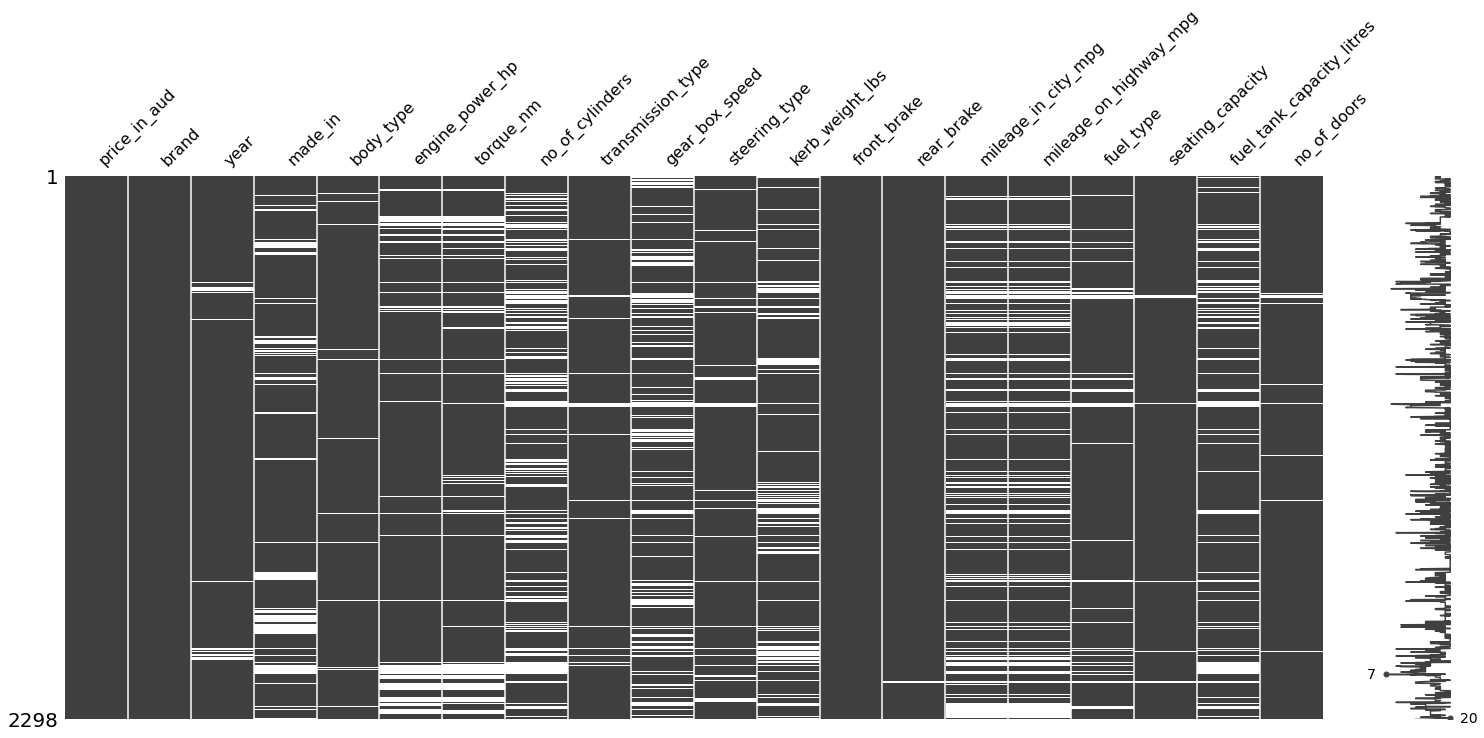

In [1263]:
#Let's visualize missing values
msno.matrix(df)

In [1264]:
all_cols = list(df.columns)
numerical_cols = list(df._get_numeric_data().columns)
categorical_cols = []

for i in all_cols:
    if i not in numerical_cols:
        categorical_cols.append(i)

<span style="color:red">
    <h3>Median and mode imputation for null values:</h3>
</span>

In [1265]:
#Filling null values with median for numerical features and mode for categorical features
for i in numerical_cols:
    df[i] = df[i].fillna(df[i].median())

for i in categorical_cols:
    df[i] = df[i].fillna(df[i].mode()[0])

<span style="color:red">
    <h3>After imputation for null values:</h3>
</span>

<AxesSubplot:>

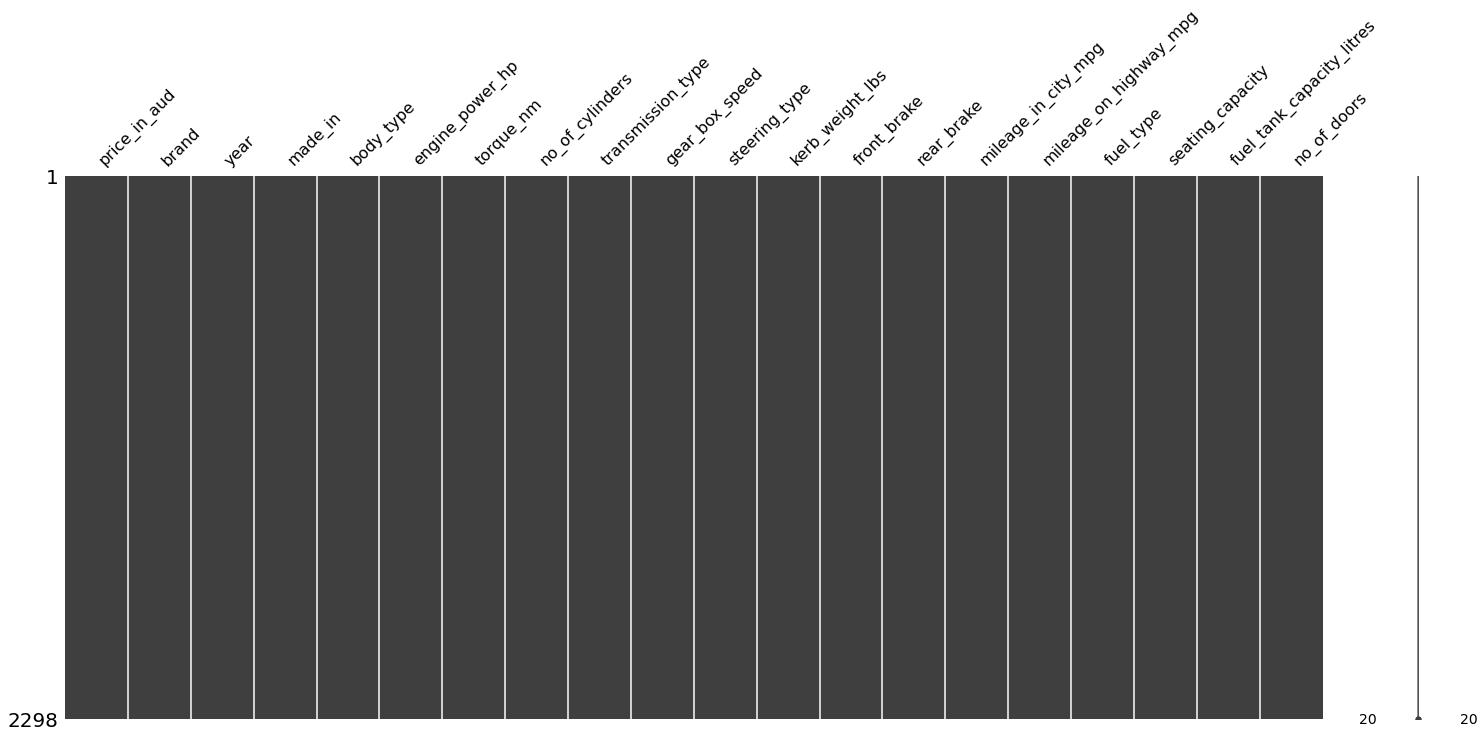

In [1266]:
#Let's again visualize missing values
msno.matrix(df)

<b>No missing values!!!</b>

<span style="color:red">
    <b>
        <h1><center>
            <u>Final data cleaning:</u>
        </h1></center>
    </b>

<span style="color:red">
    <h3>Let's look at frequency of unique values of each categoric features:</h3>
</span>

In [1267]:
for i in categorical_cols:
    print(i+' : ')
    print(df[i].value_counts())
    print()

brand : 
Mazda           60
Maserati        60
Buick           60
MINI            60
Alfa Romeo      60
Dodge           60
Honda           60
Acura           59
GMC             59
Volkswagen      59
Subaru          59
Lincoln         59
Chrysler        59
Infiniti        59
Ford            59
Porsche         58
Jeep            58
Cadillac        58
Lexus           57
KIA             57
Mercedes        57
Land Rover      57
BMW             56
Genesis         56
Toyota          56
Aston Martin    55
Lamborghini     54
Audi            54
Renault         54
Nissan          54
Jaguar          53
Chevrolet       52
Bentley         51
Hyundai         50
Tesla           49
Fiat            45
Suzuki          44
Volvo           42
Skoda           35
MG              33
Mclaren         32
Ferrari         28
Rolls Royce     20
JAC             11
Changan          9
Lotus            6
Bugatti          5
Name: brand, dtype: int64

made_in : 
United States     749
Japan             403
United Kingdom  

<b>As you can see, there are categorical features which have some very low frequency unique values which needs to be removed. Let's them in a dictionary.</b>

In [1268]:
remove_this = {"brand":["Bugatti", "Lotus"], "made_in":["France"], "body_type":["sports"], "front_brake":["air brakes (drum)"], "rear_brake":["air brakes (drum)"], "fuel_type":["cng", "-", "flex-fuel (unleaded/e85)"]}                                                                                                                                     

In [1269]:
df.shape

(2298, 20)

<b>Before there were entries of <u>2298 cars</u>.</b>

In [1270]:
for k, val in remove_this.items():
    df = df.loc[~df[k].isin(val)]

In [1271]:
df =df.reset_index(drop=True)

In [1272]:
df.shape

(2271, 20)

<b>After final there are now entries of <u>2271 cars</u></b>

In [1273]:
#Changing all interval(quantative) features to integer
interval = ["year","no_of_cylinders","gear_box_speed", "seating_capacity", "no_of_doors"]
for i in interval:
    df[i] = [int(str(x).split(".")[0]) for x in df[i]]
    df[i].astype("int64")

<span style="color:red">
    <b>
        <h1><center>
            <u>Dealing with outliers:</u>
        </h1></center>
    </b>

<span style="color:red"><b>
There are many obvious outliers in the dataset but most of them are accurate. To figure out the inaccurate outliers let's look below:
</span></b>

In [1274]:
pd.options.display.float_format = '{:.3f}'.format
df.describe()

,price_in_aud,year,engine_power_hp,torque_nm,no_of_cylinders,gear_box_speed,kerb_weight_lbs,mileage_in_city_mpg,mileage_on_highway_mpg,seating_capacity,fuel_tank_capacity_litres,no_of_doors
count,2271.000,2271.000,2271.000,2271.000,2271.000,2271.000,2271.000,2271.000,2271.000,2271.000,2271.000,2271.000
mean,141771.333,2021.834,335.226,449.731,4.653,7.321,3981.505,23.042,28.800,4.937,70.093,3.765
std,371010.688,0.976,166.235,212.610,1.574,2.018,892.229,16.566,14.117,1.333,21.700,0.842
min,5486.000,2018.000,39.000,21.100,0.000,1.000,207.000,6.000,8.000,1.000,14.000,2.000
25%,46361.000,2022.000,235.000,349.848,4.000,7.000,3535.000,17.000,24.000,5.000,59.882,4.000
50%,67594.000,2022.000,290.000,400.020,4.000,8.000,3975.000,20.000,26.000,5.000,68.220,4.000
75%,114357.500,2022.000,400.000,557.994,6.000,8.000,4386.000,23.000,30.000,5.000,76.179,4.000
max,5328000.000,2023.000,1360.000,2508.600,8.000,14.000,9700.000,150.000,133.000,12.000,189.500,5.000


<span style="color:red"><b>
    -In "kerb_weight_lbs", its min value is '207' which is very low compared to its 25 percentile.<br>
    -In "no_of_cylinders", the min value is '0' which is inaccurate.<br>
    -In "seating_capacity", the min value is '1' which also probably is inaccurate.<br><br>
    On the contrary, in "gear_box_speed", the min value is '1' which can be accurate because most electric cars have a single gear ratio.
</span></b>

<span style="color:red">
    <h2>Fixing 'kerb_weight_lbs' :</h2>
</span>

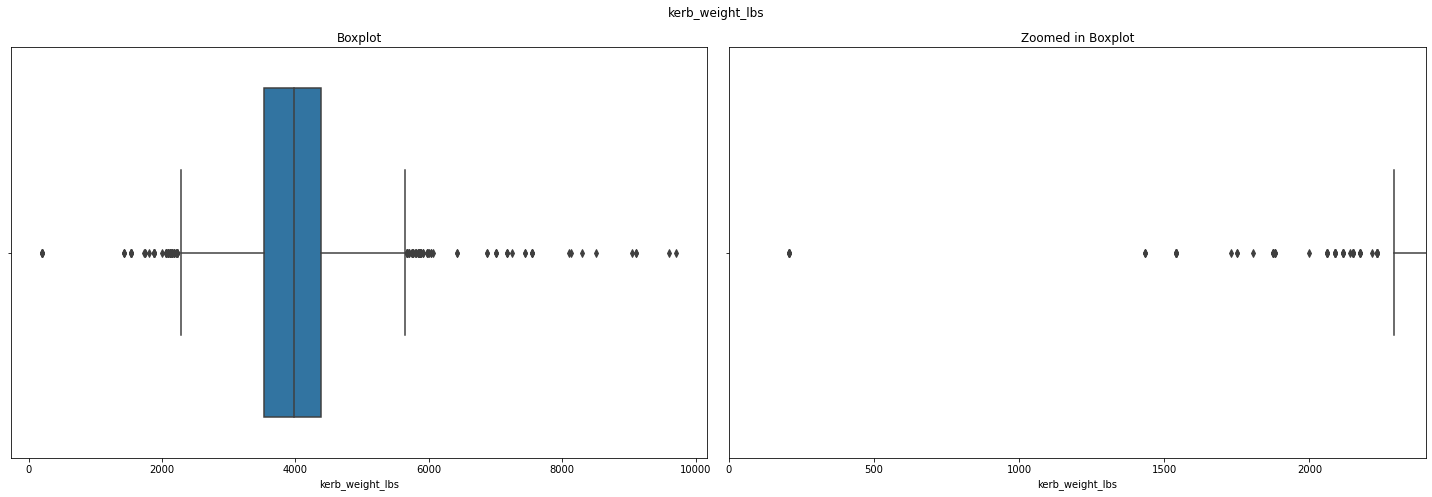

In [1275]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
fig.suptitle("kerb_weight_lbs")

sns.boxplot(ax=ax[0], data=df, x="kerb_weight_lbs")
ax[0].set_title("Boxplot")

sns.boxplot(ax=ax[1], data=df, x="kerb_weight_lbs")
ax[1].set_title("Zoomed in Boxplot")
ax[1].axis(xmin=0,xmax=2400)

plt.tight_layout()
plt.show()

In [1276]:
#Replacing 207 with 10th percentile of "kerb_weight_lbs" feature
df["kerb_weight_lbs"] = [df["kerb_weight_lbs"].quantile(0.1) if i == 207.00 else i for i in df["kerb_weight_lbs"]]

<span style="color:red">
    <h2>Fixing 'no_of_cylinders' :</h2>
</span>

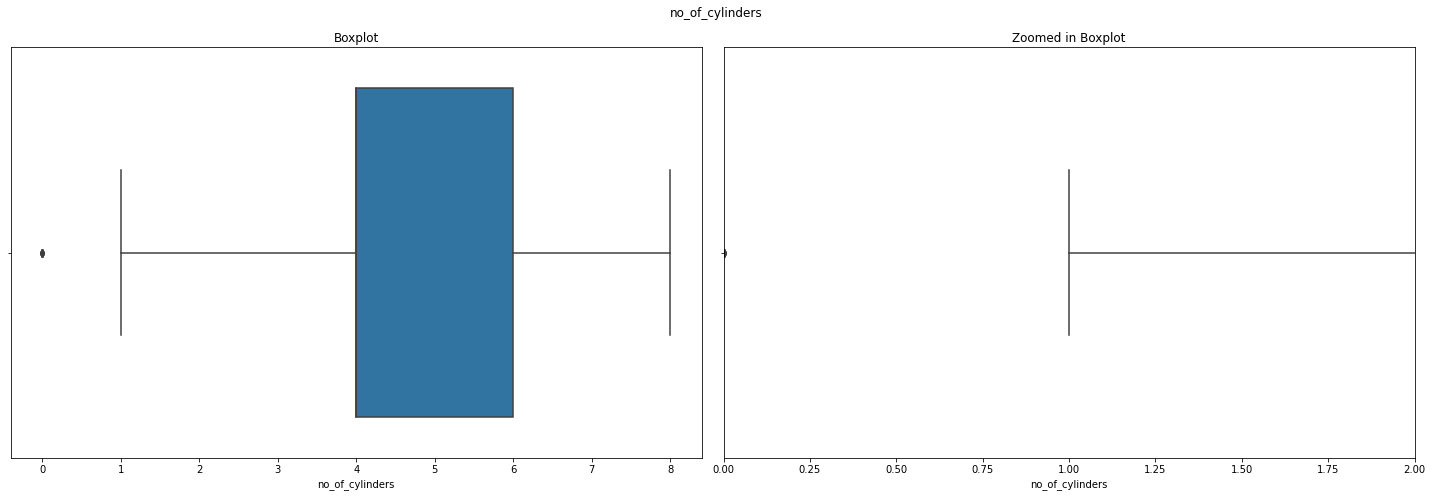

In [1277]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
fig.suptitle("no_of_cylinders")

sns.boxplot(ax=ax[0], data=df, x="no_of_cylinders")
ax[0].set_title("Boxplot")

sns.boxplot(ax=ax[1], data=df, x="no_of_cylinders")
ax[1].set_title("Zoomed in Boxplot")
ax[1].axis(xmin=0,xmax=2)

plt.tight_layout()
plt.show()

In [1278]:
df["no_of_cylinders"].value_counts()

4    1378
6     461
8     236
3      90
1      66
2      27
0      11
5       2
Name: no_of_cylinders, dtype: int64

In [1279]:
#There are only 2 and 11 cars with 5 and 0 number of cylinders respectively
#Replacing 0 with 1 and 5 with median of "no_of_cylinders" feature
df["no_of_cylinders"] = [1 if i == 0 else df["no_of_cylinders"].median() if i == 5 else i for i in df["no_of_cylinders"]]

<span style="color:red">
    <h2>Fixing 'seating_capacity' :</h2>
</span>

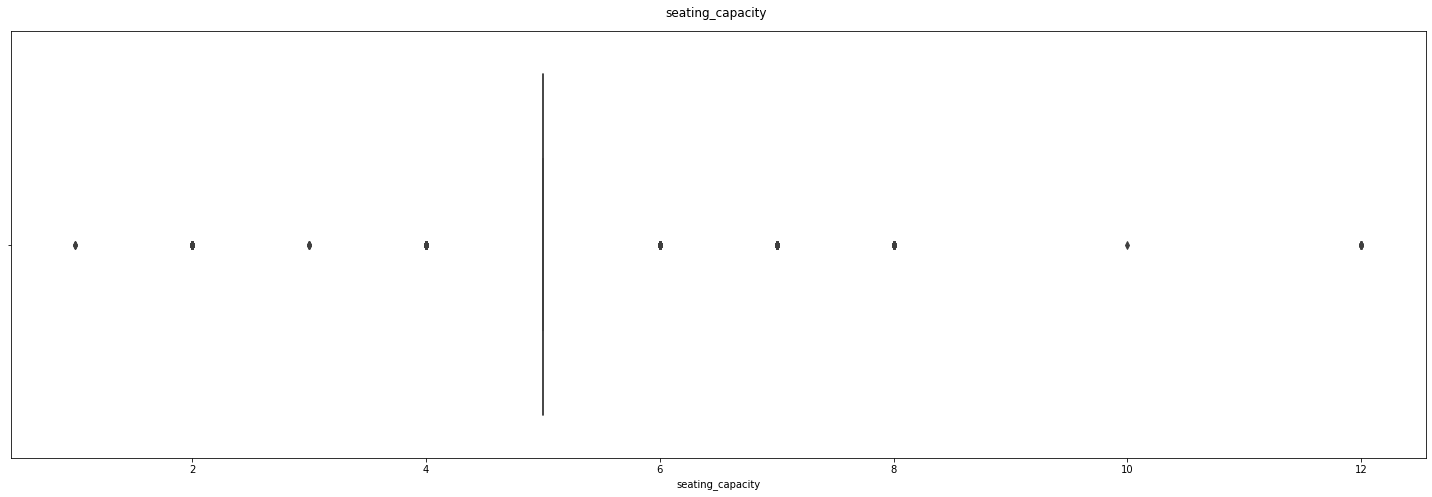

In [1280]:
fig, ax = plt.subplots(1,1, figsize=(20,7))
fig.suptitle("seating_capacity")

sns.boxplot(data=df, x="seating_capacity")

plt.tight_layout()
plt.show()

In [1281]:
df["seating_capacity"].value_counts()

5     1480
7      247
4      237
2      202
6       54
8       29
12      12
3        6
1        3
10       1
Name: seating_capacity, dtype: int64

In [1282]:
#There are only 1, 2 and 6 cars with seating capacity 10, 1 and 3 respectively

#Replacing 1 with 2 of "seating_capacity" feature
df["seating_capacity"] = [2 if i == 1 else i for i in df["seating_capacity"]]

#There 10 with 8 and, 3 with 4
df["seating_capacity"] = [8 if x==10 else 4 if x==3 else x for x in df["seating_capacity"]]

<span style="color:red">
    <h2>Fixing 'no_of_doors' :</h2>
</span>

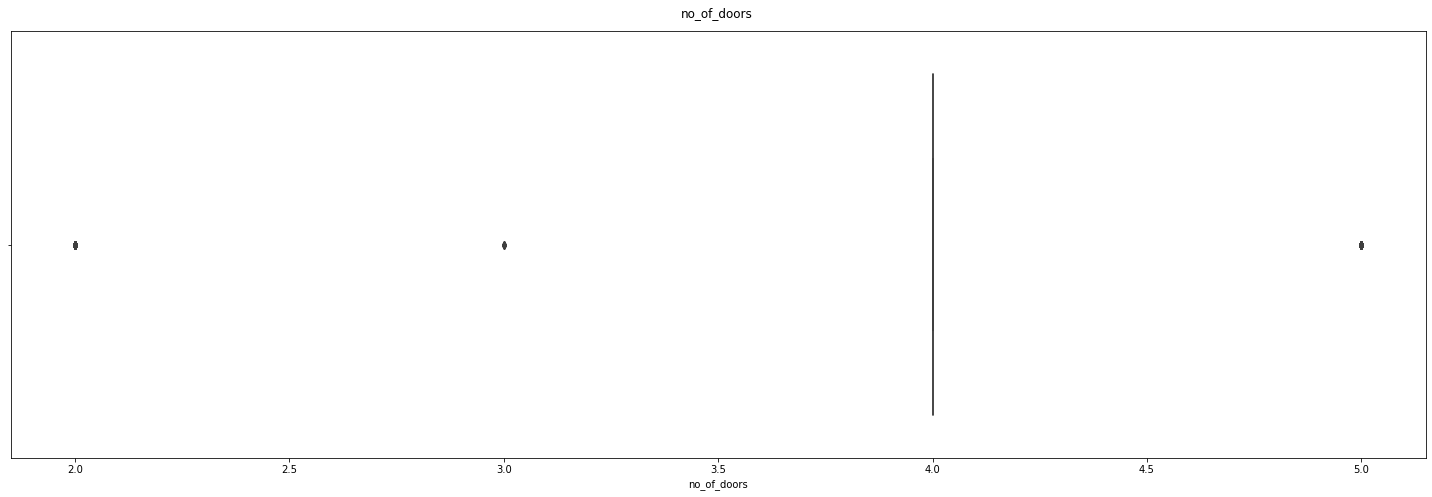

In [1283]:
fig, ax = plt.subplots(1,1, figsize=(20,7))
fig.suptitle("no_of_doors")

sns.boxplot(data=df, x="no_of_doors")

plt.tight_layout()
plt.show()

In [1284]:
df["no_of_doors"].value_counts()

4    1666
2     376
5     224
3       5
Name: no_of_doors, dtype: int64

In [1285]:
#There are only 5 cars with 3 no of doors
#Replacing 3 with 4 of "no_of_doors" feature
df["no_of_doors"] = [4 if i==3 else i for i in df["no_of_doors"]]

<span style="color:red">
    <h2>Fixing 'gear_box_speed' :</h2>
</span>

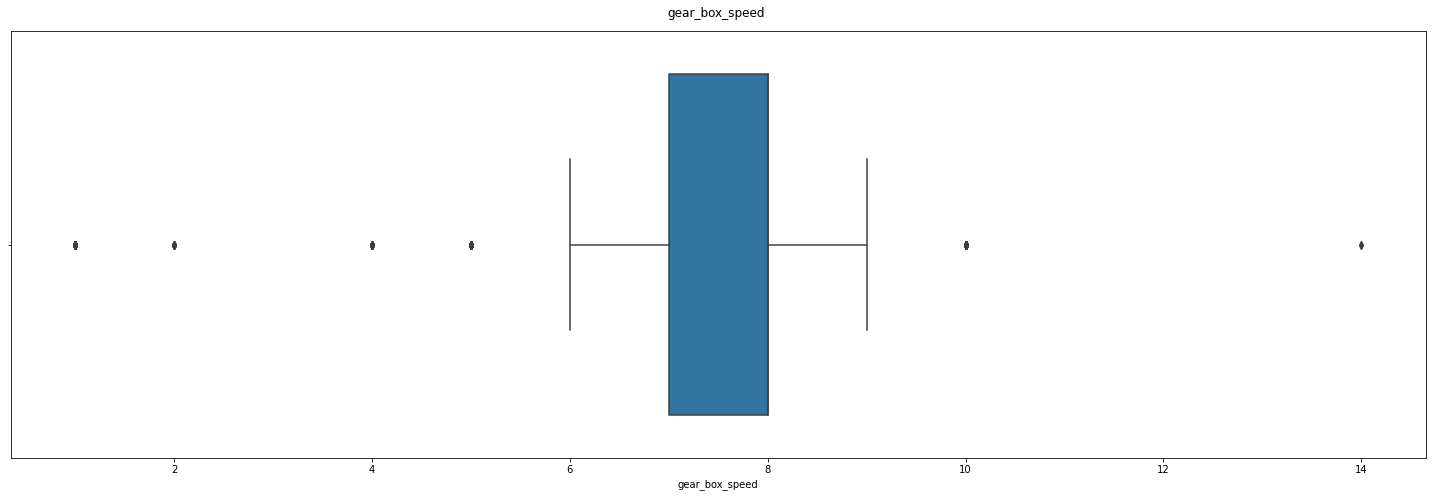

In [1286]:
fig, ax = plt.subplots(1,1, figsize=(20,7))
fig.suptitle("gear_box_speed")

sns.boxplot(data=df, x="gear_box_speed")

plt.tight_layout()
plt.show()

In [1287]:
df["gear_box_speed"].value_counts()

8     1260
6      219
9      194
7      173
10     146
1      137
5      111
4       18
2       11
14       2
Name: gear_box_speed, dtype: int64

In [1288]:
# There are only 2 cars of gear box speed 14
#Replacing 14 with 10 of "gear_box_speed" feature
df["gear_box_speed"] = [10 if i==14 else i for i in df["gear_box_speed"]]

<span style="color:red">
    <h3>Let's look at frequency of unique values of each numeric interval features(all features which were changed to integer):</h3>
</span>

In [1289]:
for i in interval:
    print(i+' : ')
    print(df[i].value_counts())
    print()

year : 
2022    1348
2023     440
2021     269
2020     121
2019      65
2018      28
Name: year, dtype: int64

no_of_cylinders : 
4.000    1380
6.000     461
8.000     236
3.000      90
1.000      77
2.000      27
Name: no_of_cylinders, dtype: int64

gear_box_speed : 
8     1260
6      219
9      194
7      173
10     148
1      137
5      111
4       18
2       11
Name: gear_box_speed, dtype: int64

seating_capacity : 
5     1480
7      247
4      243
2      205
6       54
8       30
12      12
Name: seating_capacity, dtype: int64

no_of_doors : 
4    1671
2     376
5     224
Name: no_of_doors, dtype: int64



<span style="color:red">
    <h3>Everything looks great!!</h3>
</span>

<span style="color:red">
    <b>
        <h1><center>
            <u>Final dataset:</u>
        </h1></center>
    </b>

In [1295]:
df.shape

(2271, 20)

In [1290]:
df.head(10)

,price_in_aud,brand,year,made_in,body_type,engine_power_hp,torque_nm,no_of_cylinders,transmission_type,gear_box_speed,steering_type,kerb_weight_lbs,front_brake,rear_brake,mileage_in_city_mpg,mileage_on_highway_mpg,fuel_type,seating_capacity,fuel_tank_capacity_litres,no_of_doors
0,25963.000,Honda,2022,Japan,sedan,290.000,400.020,4.000,manual,6,power,2625.000,ventilated disc,drum,15.320,20.680,diesel,5,40.000,4
1,23256.000,Honda,2022,Japan,sedan,290.000,400.020,4.000,manual,6,power,2625.000,ventilated disc,drum,16.280,20.680,gasoline,5,40.000,4
2,23515.000,Honda,2022,Japan,sedan,290.000,400.020,4.000,manual,6,power,2625.000,ventilated disc,drum,15.320,20.680,diesel,5,40.000,4
3,20650.000,Honda,2022,Japan,sedan,290.000,400.020,4.000,manual,6,power,2625.000,ventilated disc,drum,15.320,20.680,gasoline,5,40.000,4
4,23155.000,Honda,2022,Japan,sedan,290.000,400.020,4.000,automatic,8,power,2625.000,ventilated disc,drum,16.280,20.680,gasoline,5,40.000,4
5,20635.000,Honda,2022,Japan,suv,290.000,400.020,4.000,manual,6,power,2625.000,ventilated disc,drum,15.320,20.680,diesel,5,40.000,4
6,45792.000,Honda,2023,Japan,suv,190.000,242.724,4.000,automatic,8,power,3975.000,disc,disc,27.000,32.000,gasoline,5,53.060,4
7,41314.000,Honda,2023,Japan,suv,158.000,187.128,4.000,automatic,8,power,3975.000,disc,disc,26.000,32.000,gasoline,5,56.092,4
8,38722.000,Honda,2023,Japan,suv,158.000,187.128,4.000,automatic,8,power,3975.000,disc,disc,26.000,32.000,gasoline,5,68.220,4
9,34056.000,Honda,2023,Japan,suv,158.000,187.128,4.000,automatic,8,power,3975.000,disc,disc,26.000,32.000,gasoline,5,68.220,4


In [1291]:
df.describe()

,price_in_aud,year,engine_power_hp,torque_nm,no_of_cylinders,gear_box_speed,kerb_weight_lbs,mileage_in_city_mpg,mileage_on_highway_mpg,seating_capacity,fuel_tank_capacity_litres,no_of_doors
count,2271.000,2271.000,2271.000,2271.000,2271.000,2271.000,2271.000,2271.000,2271.000,2271.000,2271.000,2271.000
mean,141771.333,2021.834,335.226,449.731,4.657,7.317,3988.849,23.042,28.800,4.940,70.093,3.768
std,371010.688,0.976,166.235,212.610,1.561,2.010,872.339,16.566,14.117,1.324,21.700,0.841
min,5486.000,2018.000,39.000,21.100,1.000,1.000,1433.000,6.000,8.000,2.000,14.000,2.000
25%,46361.000,2022.000,235.000,349.848,4.000,7.000,3535.000,17.000,24.000,5.000,59.882,4.000
50%,67594.000,2022.000,290.000,400.020,4.000,8.000,3975.000,20.000,26.000,5.000,68.220,4.000
75%,114357.500,2022.000,400.000,557.994,6.000,8.000,4386.000,23.000,30.000,5.000,76.179,4.000
max,5328000.000,2023.000,1360.000,2508.600,8.000,10.000,9700.000,150.000,133.000,12.000,189.500,5.000


In [1292]:
df.describe(exclude=["int", "float"])

,brand,made_in,body_type,transmission_type,steering_type,front_brake,rear_brake,fuel_type
count,2271,2271,2271,2271,2271,2271,2271,2271
unique,45,13,10,2,10,4,5,5
top,Mazda,United States,suv,automatic,power,disc,disc,gasoline
freq,60,746,1098,2065,1829,2123,1927,1550


In [1293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   price_in_aud               2271 non-null   float64 
 1   brand                      2271 non-null   category
 2   year                       2271 non-null   int64   
 3   made_in                    2271 non-null   category
 4   body_type                  2271 non-null   category
 5   engine_power_hp            2271 non-null   float64 
 6   torque_nm                  2271 non-null   float64 
 7   no_of_cylinders            2271 non-null   float64 
 8   transmission_type          2271 non-null   category
 9   gear_box_speed             2271 non-null   int64   
 10  steering_type              2271 non-null   category
 11  kerb_weight_lbs            2271 non-null   float64 
 12  front_brake                2271 non-null   category
 13  rear_brake                 2271 n

In [1294]:
#Saving the final dataframe as csv
df.to_csv('step1-Completed.csv', index=False)